<a href="https://colab.research.google.com/github/jubijos/Exploratory_analysis_pharmaceuticals/blob/main/exploratory_concentrations_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aims

* Exploratory data analysis of the occurrence of pharmaceuticals in WWTPs worldwide
* Antibiotic analysis: active pharmaceuticals, removing efficiency
* Correlation analysis

# Importing libraries

In [ ]:
# Importando os pacotes
import numpy as np
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Importing dataset, initial preparation

In [ ]:
# Importando os dados da literatura
literatura = pd.read_csv("/content/sample_data/dadosdaliteratura2 - Concentracoes.csv", sep = ',', low_memory=False)

# Excluindo coluna "fonte" dos dados da literatura e alterando nome de colunas
literatura = literatura.drop(['Fonte'], axis=1)
literatura.columns = ['Principioativo', 'classeterapeutica','cent','csai','efremocao','tecnica','Local']

# Converter colunas para numeric
literatura[['cent', 'csai','efremocao']] = literatura[['cent', 'csai','efremocao']].apply(pd.to_numeric)

# Verifica a quantidade de observações de cada PA
literatura.groupby('Principioativo').size().sort_values(ascending = False)

literatura.head()

,Principioativo,classeterapeutica,cent,csai,efremocao,tecnica,Local
0,Diclofenaco,Anti inflamatório,131.61,8.1,94.0,digestor anaeróbio + tanque anóxico,Portugal
1,Diclofenaco,Anti inflamatório,601.00,3.2,46.8,Lodo ativado,China
2,Eritromicina,Antibiótico,254.24,153.0,39.8,Lodo ativado,China
3,Sulfametoxazol,Antibiótico,2935.40,1147.9,60.9,Lodo ativado,China
4,Sulfametoxazol,Antibiótico,2500.00,800.0,68.0,reator aeróbico,Canadá


In [ ]:
# Inserir coluna de continente na base.

literatura.Local.value_counts()

# ÁSIA: China, Japão, Índia, Coreia do Sul, Turquia
# AMÉRICA: Brasil, Canadá, Estados Unidos, México, Chile, Canada, Colômbia
# EUROPA: Espanha, Reino Unido, Holanda, Itália, Grécia, Polônia, França, Áustria, República Tcheca, Alemanha, Portugal
# África: Quênia

China               157
Japão               109
Canadá               92
Brasil               74
Turquia              72
Espanha              69
Reino Unido          59
Índia                38
Estados Unidos       38
Holanda              32
Itália               31
Grécia               24
Polônia              23
México               22
França               20
Áustria              19
Coreia do Sul        17
República Tcheca     13
Quênia               12
Alemanha              8
Portugal              5
Chile                 4
Colômbia              2
Name: Local, dtype: int64

In [ ]:
literatura.tecnica.value_counts()

In [ ]:
# Cria as condições, depois valores e depois a coluna

condicao = [
    (literatura['Local'] == 'China')|(literatura['Local'] == 'Japão')|
    (literatura['Local'] == 'Índia')|(literatura['Local'] == 'Coreia do Sul')|
    (literatura['Local'] == 'Turquia'),
    (literatura['Local'] == 'Brasil')|(literatura['Local'] == 'Canadá')|
    (literatura['Local'] == 'Estados Unidos')|(literatura['Local'] == 'México')|
    (literatura['Local'] == 'Chile')|(literatura['Local'] == 'Canada')|
    (literatura['Local'] == 'Colômbia'),
    (literatura['Local'] == 'Espanha')|(literatura['Local'] == 'Reino Unido')|
    (literatura['Local'] == 'Holanda')|(literatura['Local'] == 'Itália')|
    (literatura['Local'] == 'Grécia')|(literatura['Local'] == 'Polônia')|
    (literatura['Local'] == 'França')|(literatura['Local'] == 'Áustria')|
    (literatura['Local'] == 'República Tcheca')|(literatura['Local'] == 'Alemanha')|
    (literatura['Local'] == 'Portugal'),
    (literatura['Local'] == 'Quênia')
    ]

valores = ['Ásia', 'América', 'Europa', 'África']

literatura['continente'] = np.select(condicao, valores)

In [ ]:
literatura.shape
literatura.info
literatura.describe()

,cent,csai,efremocao
count,940.000000,940.000000,940.000000
mean,3737.912968,877.338511,12.608851
std,17078.449212,4429.644037,228.530061
min,0.320000,0.000000,-5451.780000
25%,119.750000,47.075000,6.070000
50%,344.000000,152.000000,47.055000
75%,1169.250000,446.250000,80.262500
max,260495.000000,94230.000000,100.000000


In [ ]:
literatura.groupby(['classeterapeutica']).describe().T

classeterapeutica  Anti inflamatório   Antibiótico  Droga psiquiátrica
cent      count           417.000000    356.000000          167.000000
          mean           6845.089185   1160.955955         1472.668743
          std           24483.569502   4992.637125         7120.437775
          min               0.390000      0.320000            1.400000
          25%             221.000000     98.900000           79.200000
          50%             806.000000    204.000000          300.000000
          75%            2448.000000    532.000000          585.000000
          max          260495.000000  72700.000000        83620.000000
csai      count           417.000000    356.000000          167.000000
          mean            938.395084    928.695365          615.400599
          std            3149.177049   6247.327546         1609.335804
          min               0.030000      0.000000            1.400000
          25%              47.000000     39.825000           89.500000
          50%             164.000000     92.300000          260.000000
          75%             530.000000    338.000000          560.500000
          max           43813.000000  94230.000000        12891.600000
efremocao count           417.000000    356.000000          167.000000
          mean             45.388765      1.209846          -44.943114
          std              96.676831    314.674021          232.231365
          min           -1022.220000  -5451.780000        -1930.200000
          25%              27.190000     12.362500          -30.165000
          50%              67.100000     44.475000            0.000000
          75%              92.440000     70.012500           24.200000
          max              99.930000    100.000000           99.680000

In [ ]:
# Verificar quantidade de obs que apresentam % de remoção < 0 (ou seja, a concentração do PA aumentou, formou metabólitos)

literatura[(literatura['efremocao'])<0].value_counts().sum()

198

In [ ]:
# Verificando quantas obs com % de remoção < 0 tem em cada classe terapêutica

df_efneg = literatura.query("efremocao < 0")
df_efneg.groupby('classeterapeutica').describe().T # 64 obs com % de remoção negativas em antibióticos

classeterapeutica  Anti inflamatório   Antibiótico  Droga psiquiátrica
cent      count            51.000000     64.000000           83.000000
          mean           1439.560784    916.948281          393.417831
          std            5219.694778   2511.628241          480.752156
          min               0.400000      4.400000            1.400000
          25%              89.700000     39.750000           59.100000
          50%             280.000000    141.000000          240.000000
          75%             820.500000    364.750000          535.000000
          max           36750.000000  12070.000000         2461.700000
csai      count            51.000000     64.000000           83.000000
          mean           1948.786275   2617.118750          657.281928
          std            6246.020319  11996.564893         1488.932512
          min               1.200000      6.600000            2.000000
          25%             122.050000     94.750000          118.000000
          50%             490.000000    306.000000          320.000000
          75%            1210.000000    721.750000          680.000000
          max           43813.000000  94230.000000        12891.600000
efremocao count            51.000000     64.000000           83.000000
          mean           -108.269216   -236.778281         -126.868795
          std             209.242740    696.052077          307.754189
          min           -1022.220000  -5451.780000        -1930.200000
          25%             -99.730000   -163.692500          -53.830000
          50%             -28.890000    -50.765000          -30.540000
          75%             -13.580000    -23.962500          -13.695000
          max              -0.600000     -0.240000           -2.780000

É bem claro que esses dados deverão ser normalizados para visualizar. Mas vou fazer alguns gráficos com os dados brutos, para ver os valores das variáveis plotados e depois, faço a normalização.

# Gráficos Exploratórios

<Axes: xlabel='classeterapeutica', ylabel='csai'>

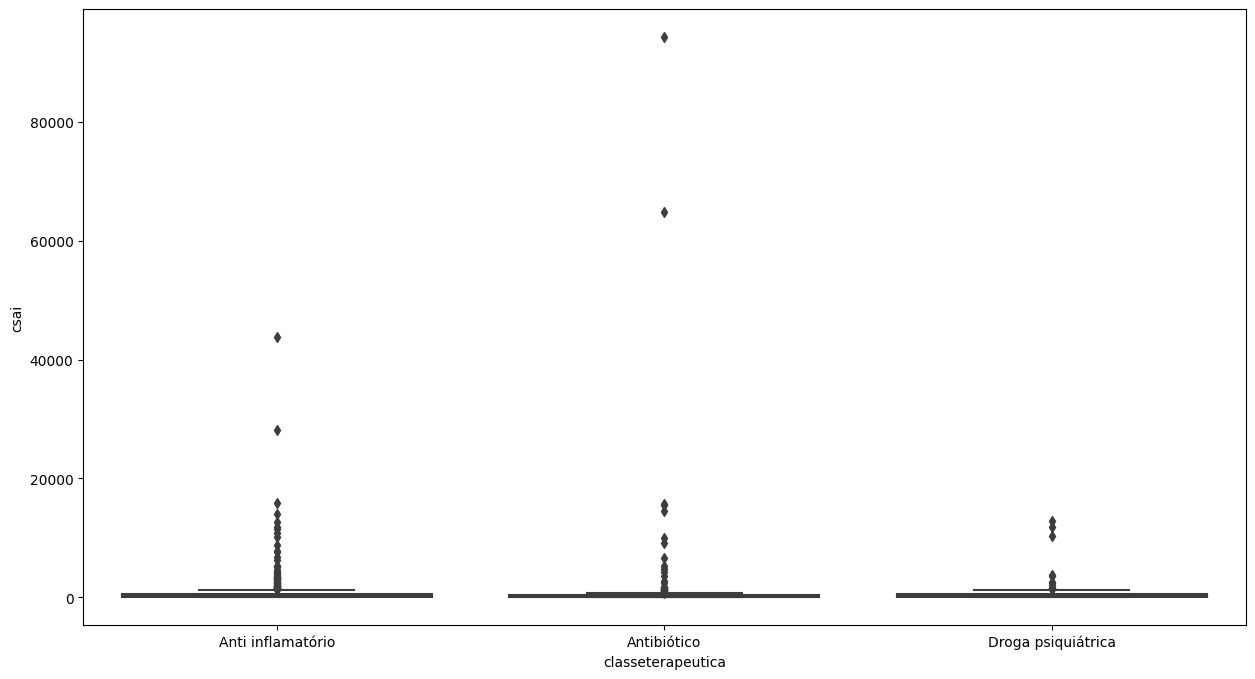

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='classeterapeutica', y='csai', data=literatura)

<Figure size 1500x1200 with 0 Axes>

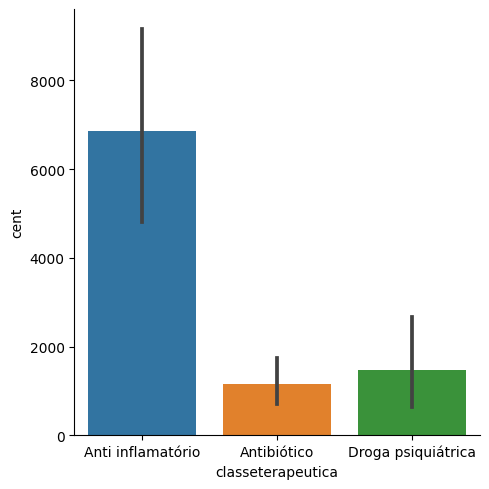

<Figure size 1500x1200 with 0 Axes>

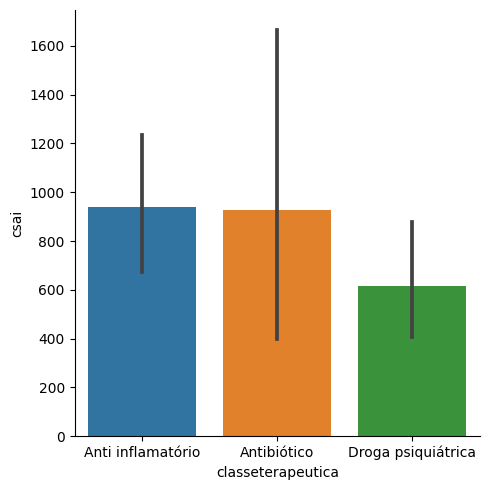

In [ ]:
plt.figure(figsize=(15,12))
sns.catplot(x='classeterapeutica', y='cent', kind = 'bar', data=literatura)

plt.figure(figsize=(15,12))
sns.catplot(x='classeterapeutica', y='csai', kind = 'bar', data=literatura)

Anti inflamatórios entram com as maiores concentrações na ETE, entretanto, o processo reduz as concentrações de saída para cerca de 1000 ng/L. Os antibióticos por exemplo, entram no processo com centrações de aproximadamente 1000 e ao final, saem a pouco menos de 1000 ng/L. Ou seja, são bem resistentes ao tratamento. Drogas psiquiátricas também respondem 'bem' ao tratamento, pois enquanto a concentração de entrada é quase 2000 ng/L, a concentração de saída é de 600 ng/L.

<Axes: xlabel='classeterapeutica', ylabel='efremocao'>

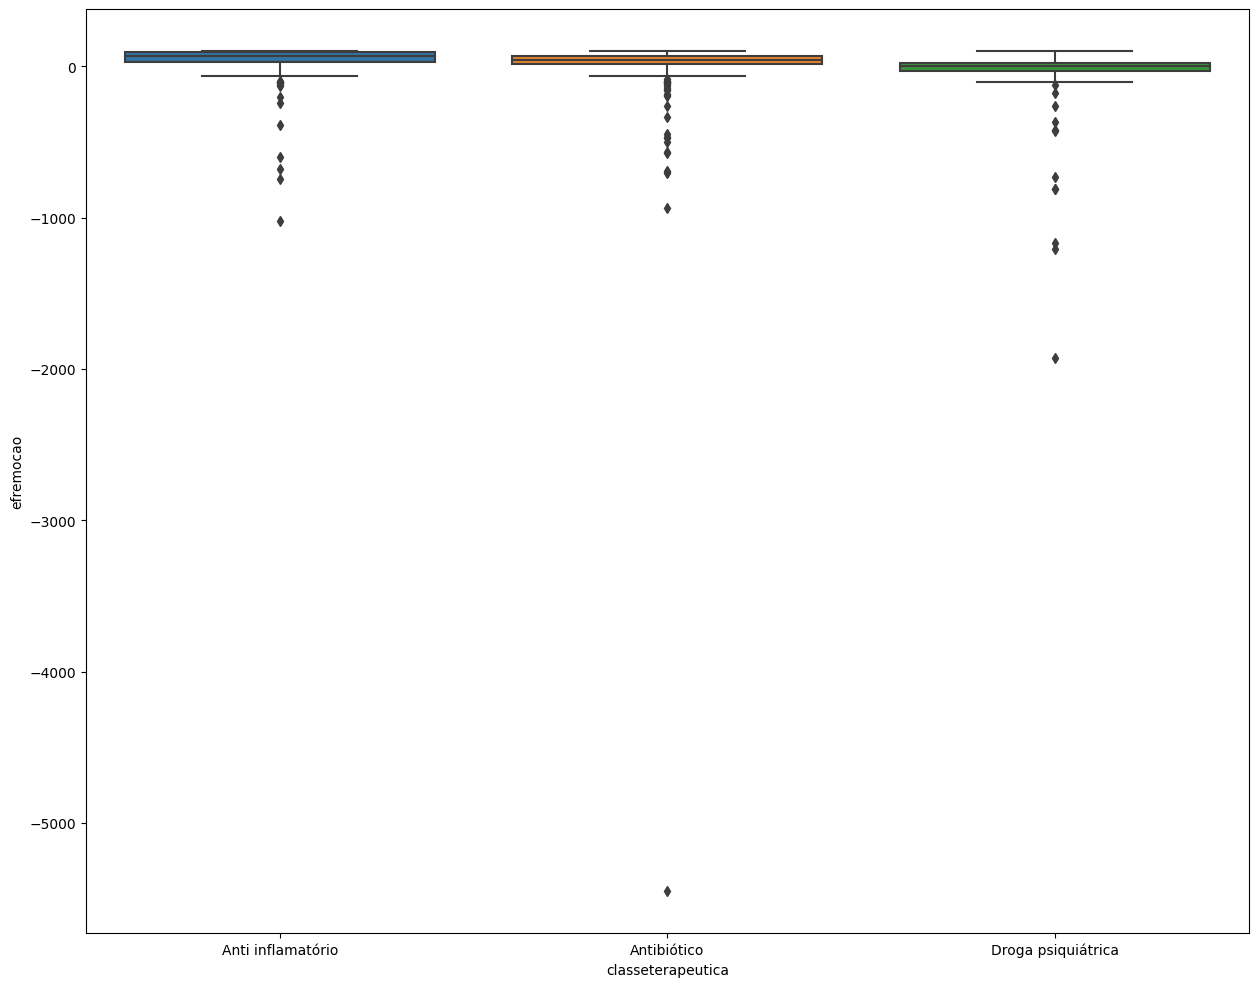

In [ ]:
# Plotando as eficiências de remoção por classe terapeutica

plt.figure(figsize=(15,12))
sns.boxplot(x='classeterapeutica', y='efremocao', data=literatura)

Muitas eficiências negativas.

Text(0.5, 0.98, 'Todas as obs')

<Figure size 1500x1200 with 0 Axes>

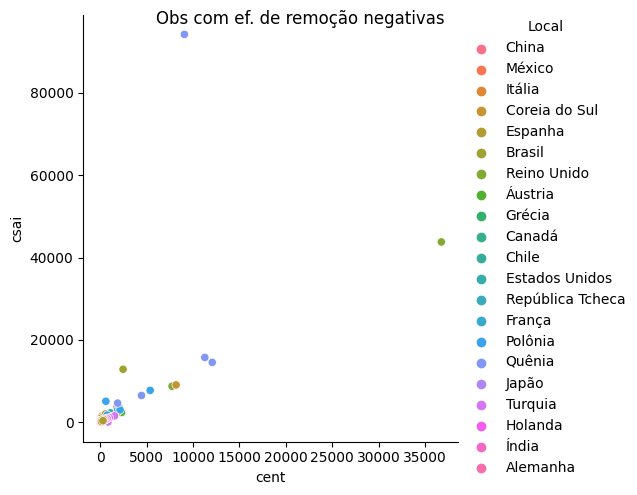

<Figure size 1500x1200 with 0 Axes>

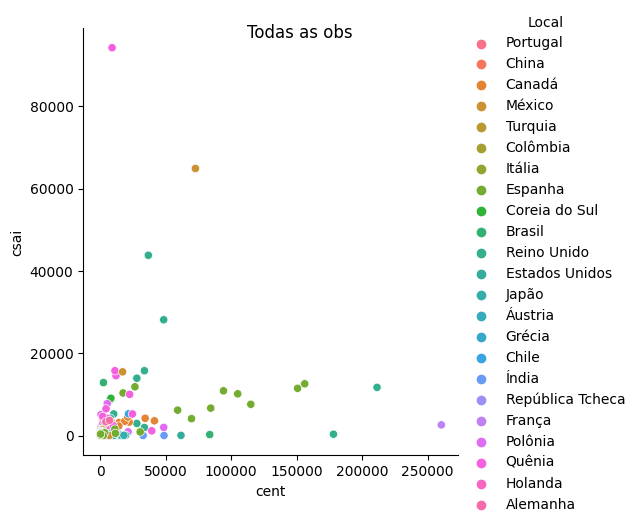

In [ ]:
# Plotando com base na ef. de remoção x países

df_efneg = literatura.query("efremocao < 0")

plt.figure(figsize=(15,12))
sns.relplot(x='cent', y='csai', hue = 'Local', data=df_efneg).fig.suptitle('Obs com ef. de remoção negativas')

plt.figure(figsize=(15,12))
sns.relplot(x='cent', y='csai', hue = 'Local', data=literatura).fig.suptitle('Todas as obs')

Text(0.5, 0.98, 'Todas as obs')

<Figure size 1500x1200 with 0 Axes>

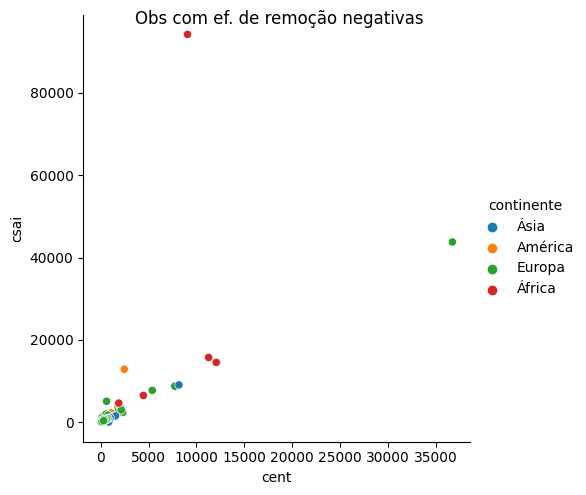

<Figure size 1500x1200 with 0 Axes>

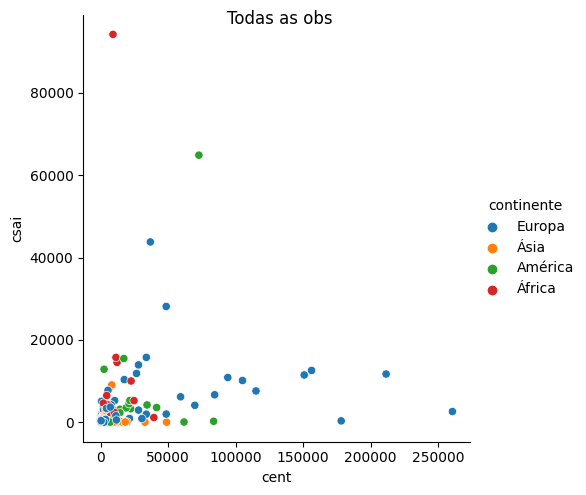

In [ ]:
# Plotando cent x csai x continente

plt.figure(figsize=(15,12))
sns.relplot(x='cent', y='csai', hue = 'continente', data=df_efneg).fig.suptitle('Obs com ef. de remoção negativas')

plt.figure(figsize=(15,12))
sns.relplot(x='cent', y='csai', hue = 'continente', data=literatura).fig.suptitle('Todas as obs')

Em relação às ef. de remoção negativas, a África apresenta os valores mais altos de concentrações de entrada e saída. Já em relação À ef. de remoção negativas ou positivas, A África continua tendo a maior concentração de saída, seguida pela América e Europa. A Europa apresenta as maiores concentrações de entrada.

Text(0.5, 0.98, 'Obs com ef. de remoção negativas')

<Figure size 1500x1200 with 0 Axes>

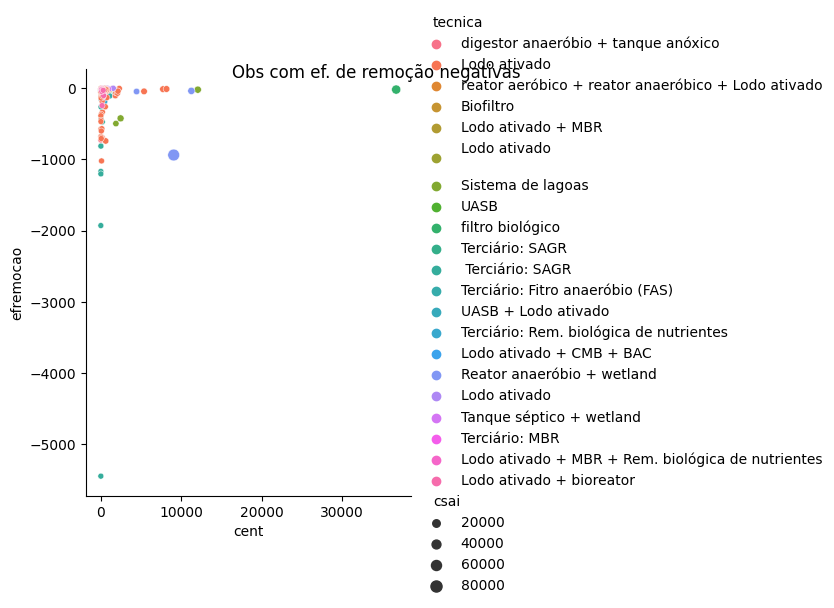

In [ ]:
# Considerando a ef. de remoção

plt.figure(figsize=(15,12))
sns.relplot(x='cent', y='efremocao', hue = 'tecnica', size='csai', data=df_efneg).fig.suptitle('Obs com ef. de remoção negativas')

Text(0.5, 0.98, 'Obs com ef. de remoção negativas')

<Figure size 1500x1200 with 0 Axes>

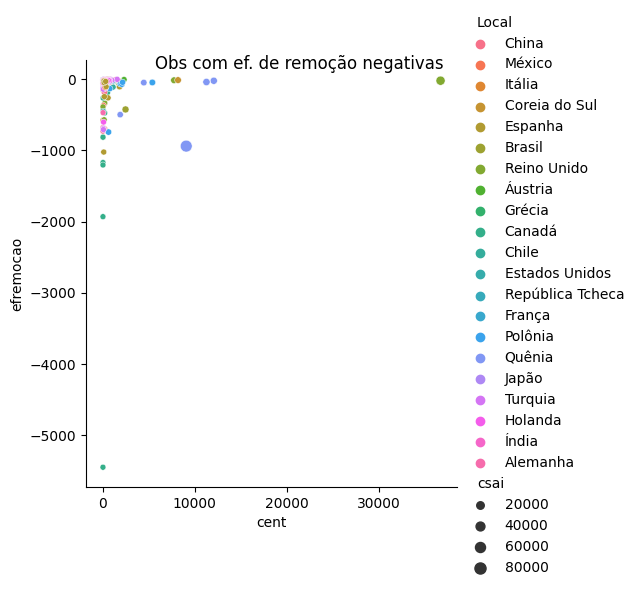

In [ ]:
# ef. de remoção <0 por países

plt.figure(figsize=(15,12))
sns.relplot(x='cent', y='efremocao', hue = 'Local', size='csai', data=df_efneg).fig.suptitle('Obs com ef. de remoção negativas')

Text(0.5, 0.98, 'Obs com ef. de remoção negativas')

<Figure size 1500x1200 with 0 Axes>

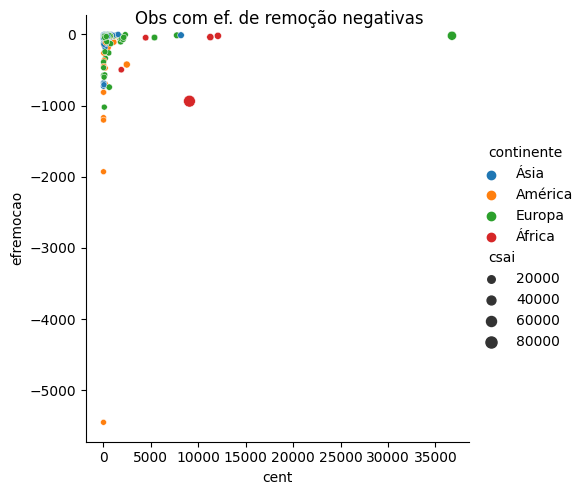

In [ ]:
# Ef. de remoc <0 por continente

plt.figure(figsize=(15,12))
sns.relplot(x='cent', y='efremocao', hue = 'continente', size='csai', data=df_efneg).fig.suptitle('Obs com ef. de remoção negativas')

Text(0.5, 0.98, 'Obs com ef. de remoção negativas')

<Figure size 1500x1200 with 0 Axes>

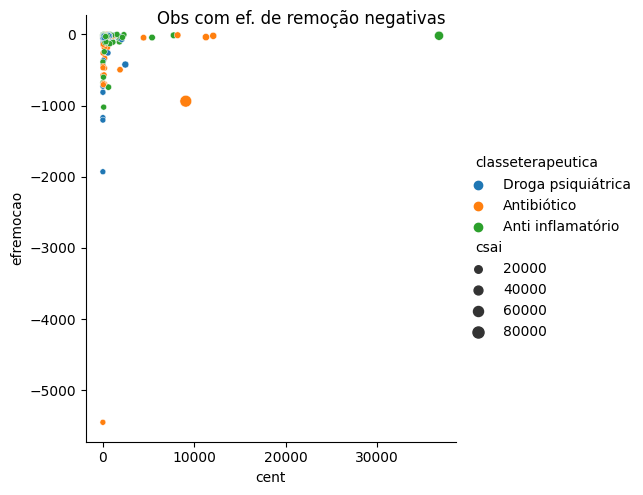

In [ ]:
# Obs com % de remoção negativa considerando a classe terapêutica

plt.figure(figsize=(15,12))
sns.relplot(x='cent', y='efremocao', hue = 'classeterapeutica', size='csai', data=df_efneg).fig.suptitle('Obs com ef. de remoção negativas')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'China '),
  Text(1, 0, 'México'),
  Text(2, 0, 'China'),
  Text(3, 0, 'Itália'),
  Text(4, 0, 'Coreia do Sul'),
  Text(5, 0, 'Espanha'),
  Text(6, 0, 'Brasil'),
  Text(7, 0, 'Reino Unido'),
  Text(8, 0, 'Áustria'),
  Text(9, 0, 'Grécia'),
  Text(10, 0, 'Canadá'),
  Text(11, 0, 'Chile'),
  Text(12, 0, 'Estados Unidos'),
  Text(13, 0, 'República Tcheca'),
  Text(14, 0, 'França'),
  Text(15, 0, 'Polônia'),
  Text(16, 0, 'Quênia'),
  Text(17, 0, 'Japão'),
  Text(18, 0, 'Turquia'),
  Text(19, 0, 'Holanda'),
  Text(20, 0, 'Índia'),
  Text(21, 0, 'Alemanha')])

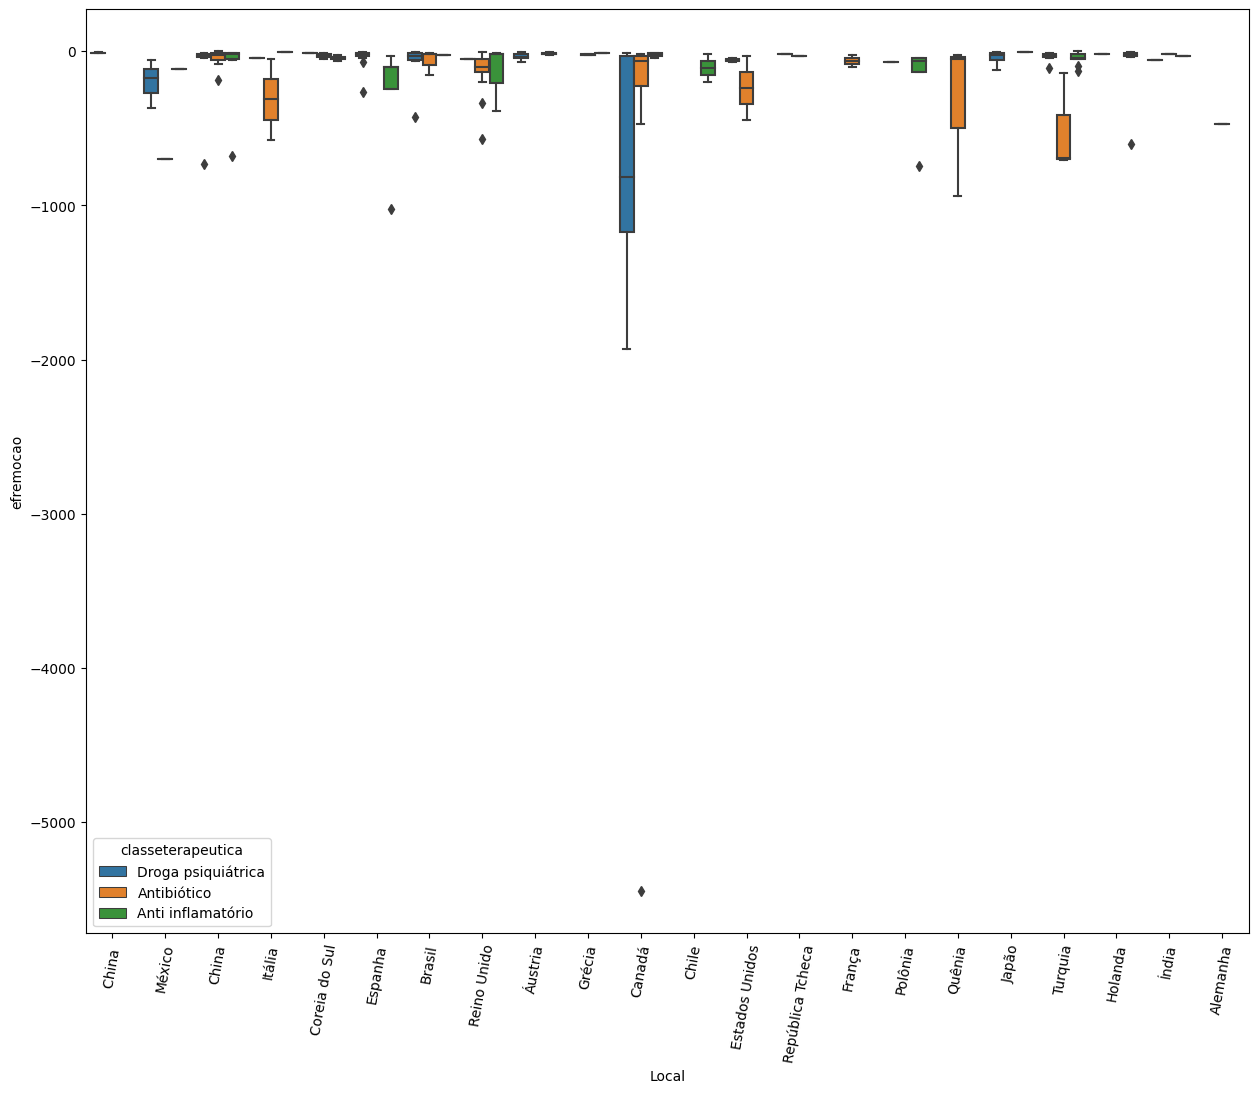

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(x='Local', y='efremocao', hue = 'classeterapeutica', data=df_efneg)
plt.xticks(rotation=80)

Text(0.5, 0.98, 'Obs com ef. de remoção positivas')

<Figure size 1500x1200 with 0 Axes>

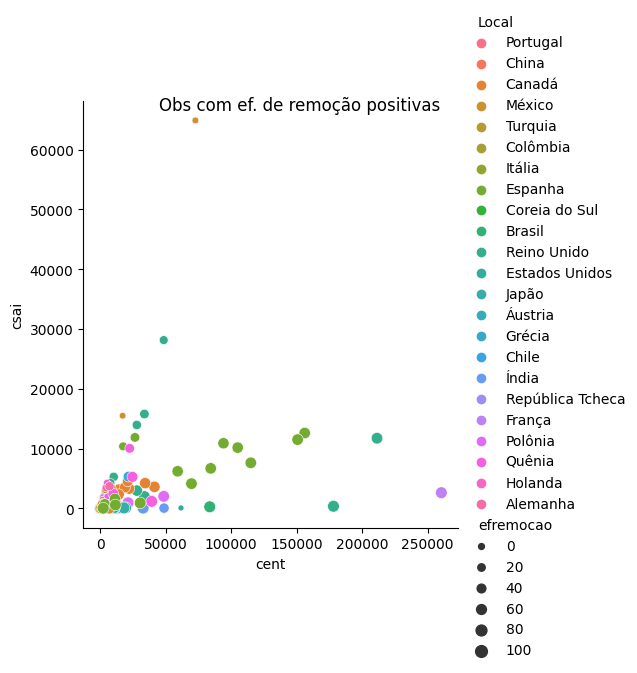

In [ ]:
# Separando apenas dados com % de remoção > 0

df_efpos= literatura.query("efremocao >= 0")

plt.figure(figsize=(15,12))
sns.relplot(x='cent', y='csai', hue = 'Local', size = 'efremocao', data=df_efpos).fig.suptitle('Obs com ef. de remoção positivas')

Text(0.5, 0.98, 'Obs com ef. de remoção positivas')

<Figure size 1500x1200 with 0 Axes>

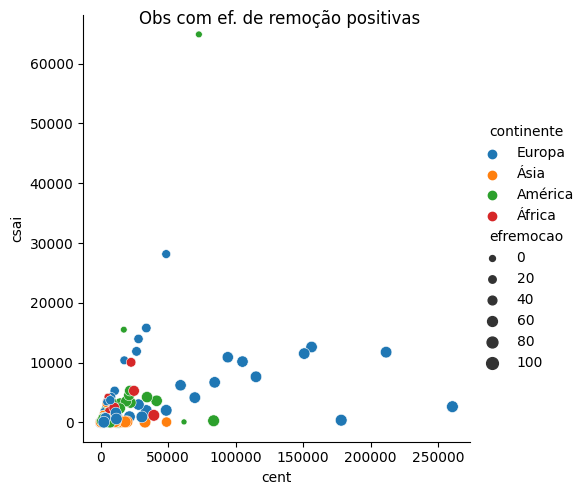

In [ ]:
plt.figure(figsize=(15,12))
sns.relplot(x='cent', y='csai', hue = 'continente', size = 'efremocao', data=df_efpos).fig.suptitle('Obs com ef. de remoção positivas')

Text(0.5, 0.98, 'Obs com ef. de remoção positivas')

<Figure size 1500x1200 with 0 Axes>

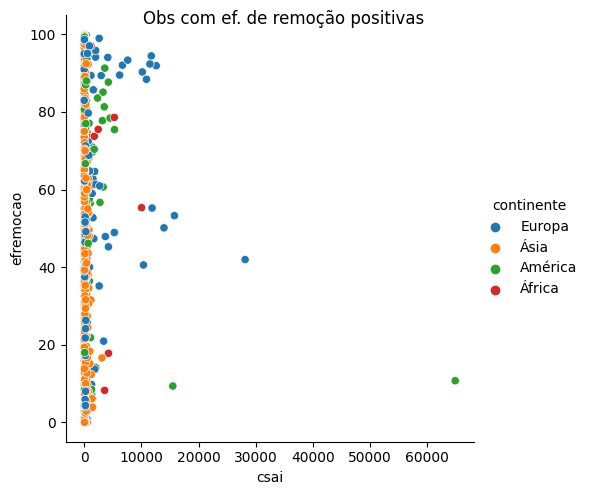

In [ ]:
# Ef. de remoção x concentração de saída por continente


plt.figure(figsize=(15,12))
sns.relplot(x='csai', y='efremocao', hue = 'continente', data=df_efpos).fig.suptitle('Obs com ef. de remoção positivas')

(array([0, 1, 2]),
 [Text(0, 0, 'Anti inflamatório'),
  Text(1, 0, 'Antibiótico'),
  Text(2, 0, 'Droga psiquiátrica')])

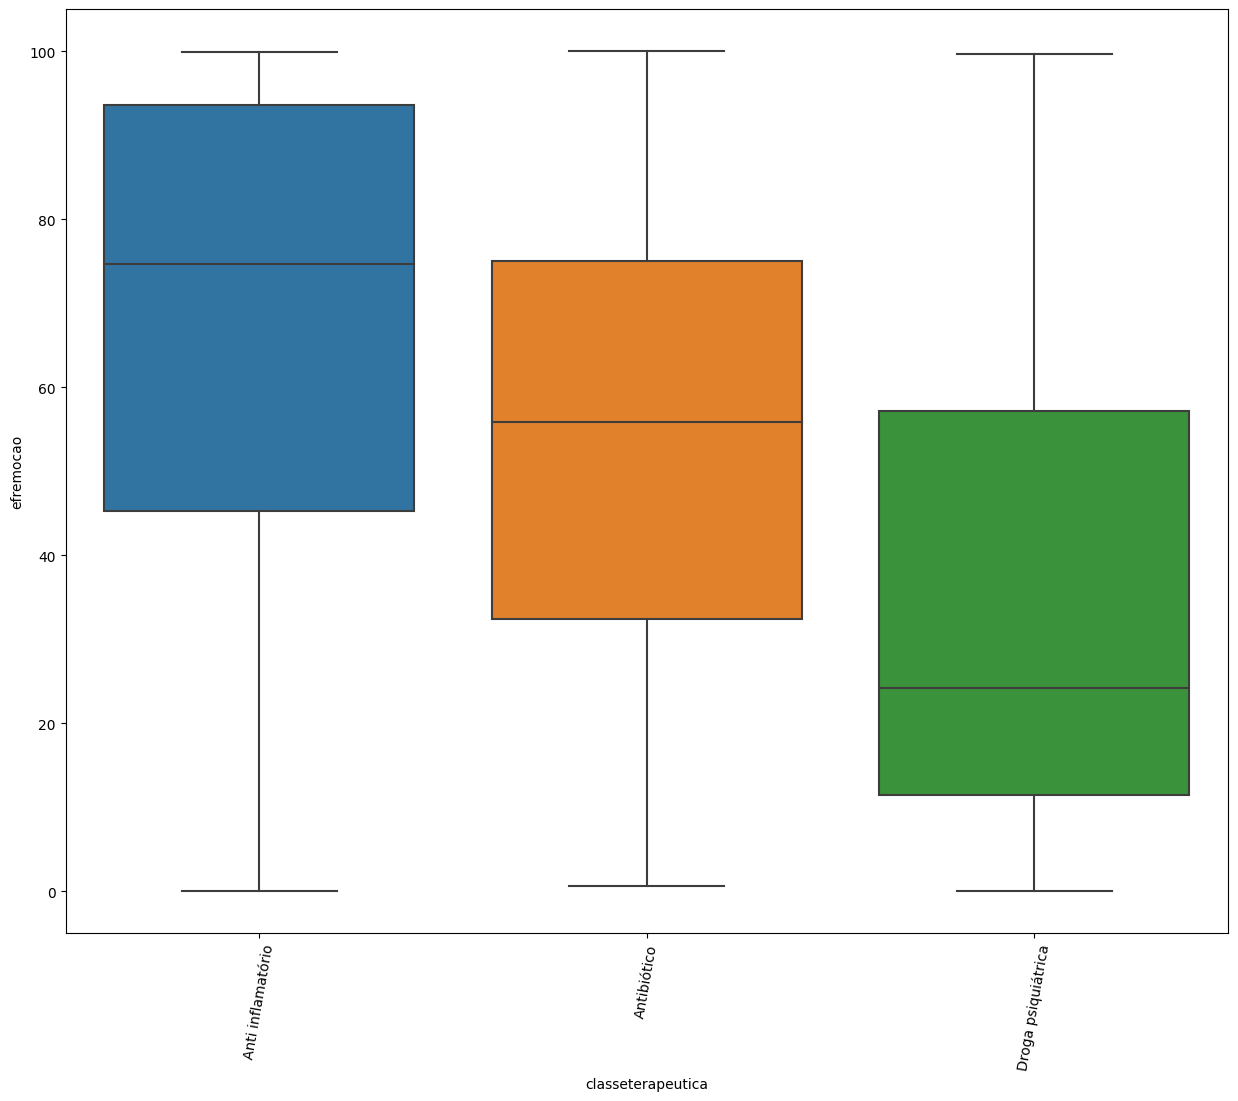

In [ ]:
# Visualizando as ef. de remoção positivas por classe terapêuticas

plt.figure(figsize=(15,12))
sns.boxplot(x='classeterapeutica', y='efremocao', data=df_efpos)
plt.xticks(rotation=80)

Em relação as obs com ef. de remoção positivas, da classe terapêutica com maior eficiência de remoção para a menor: antiinflamatório, antibiótico, droga psiquiátrica.

(array([0, 1, 2]),
 [Text(0, 0, 'Anti inflamatório'),
  Text(1, 0, 'Antibiótico'),
  Text(2, 0, 'Droga psiquiátrica')])

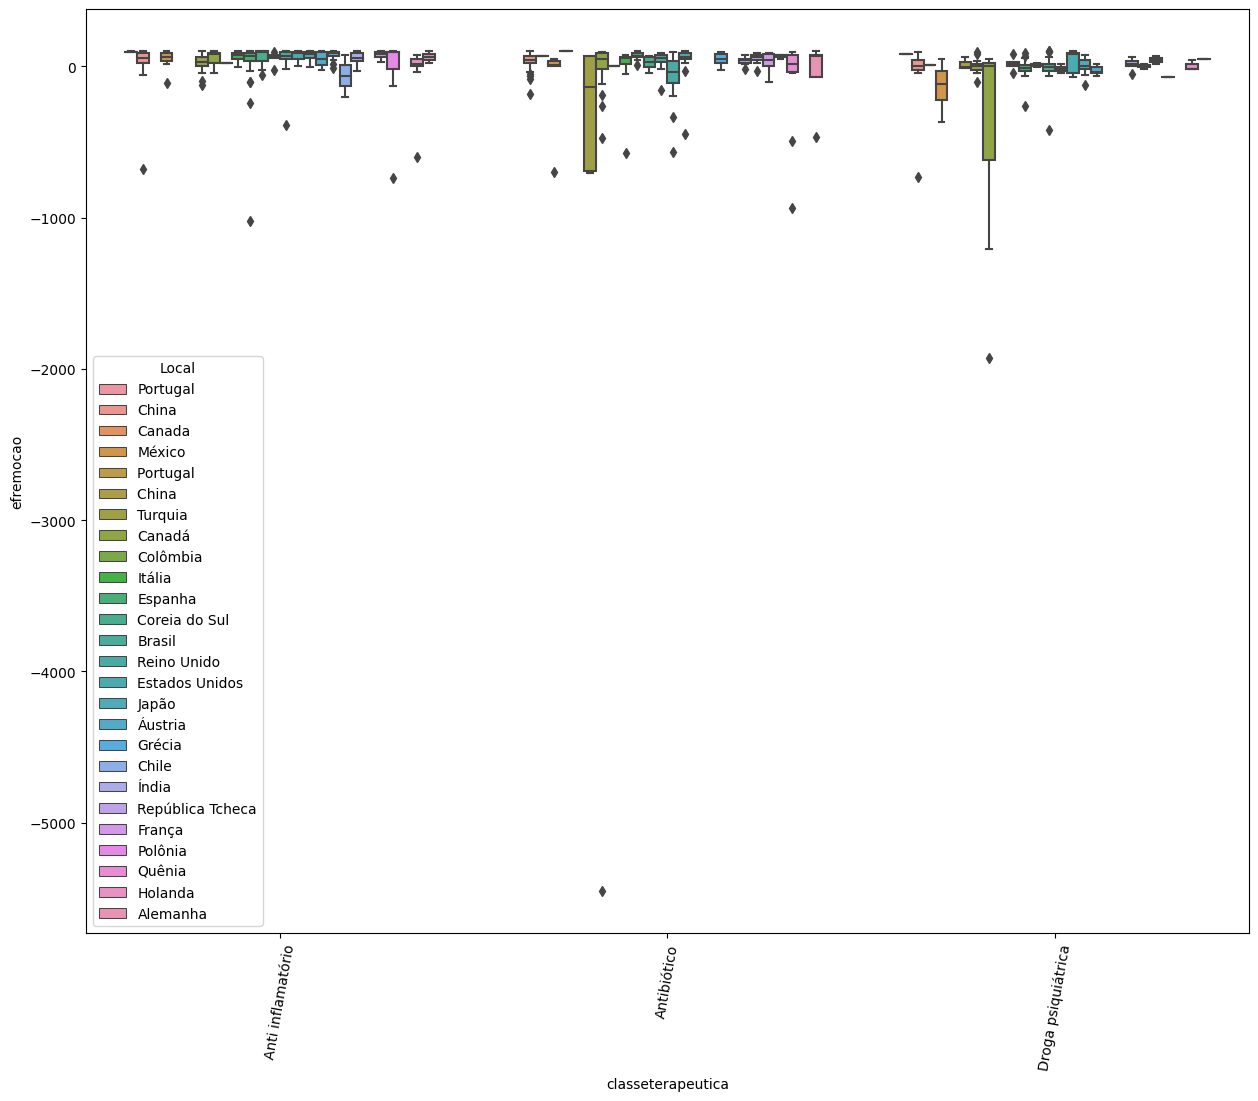

In [ ]:
# Boxplot para ef. de remoção + e -.

plt.figure(figsize=(15,12))
sns.boxplot(x='classeterapeutica', y='efremocao', hue = 'Local', data=literatura)
plt.xticks(rotation=80)

(array([0, 1, 2]),
 [Text(0, 0, 'Anti inflamatório'),
  Text(1, 0, 'Antibiótico'),
  Text(2, 0, 'Droga psiquiátrica')])

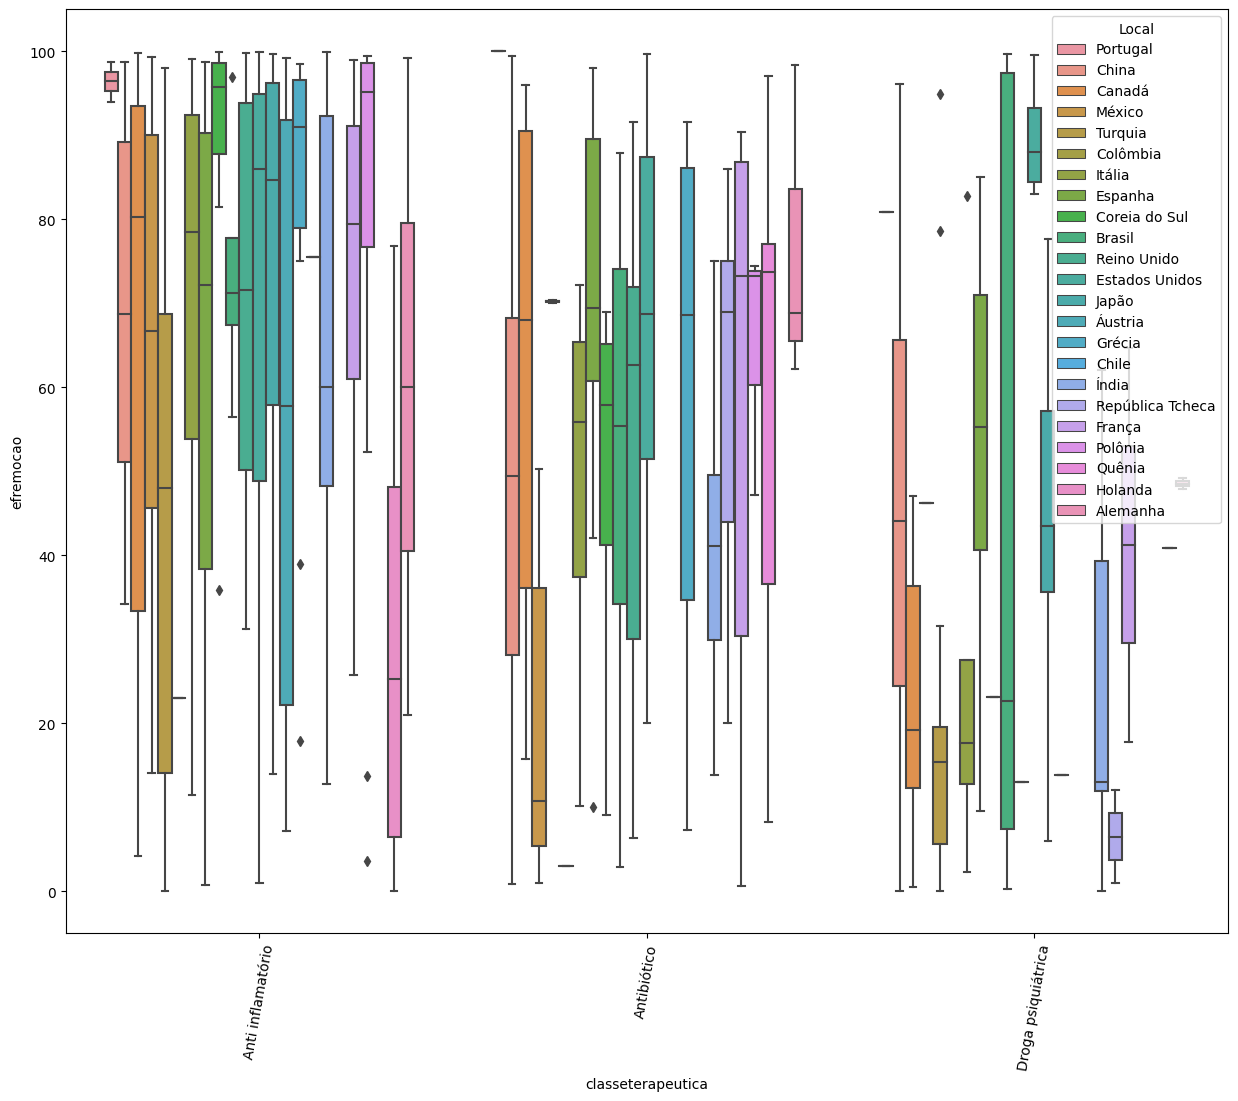

In [ ]:
# Boxplot apenas para as ef. de remoção + - plotar legenda fora do gráfico

plt.figure(figsize=(15,12))
sns.boxplot(x='classeterapeutica', y='efremocao', hue = 'Local', data=df_efpos)
plt.xticks(rotation=80)

(array([0, 1, 2]),
 [Text(0, 0, 'Anti inflamatório'),
  Text(1, 0, 'Antibiótico'),
  Text(2, 0, 'Droga psiquiátrica')])

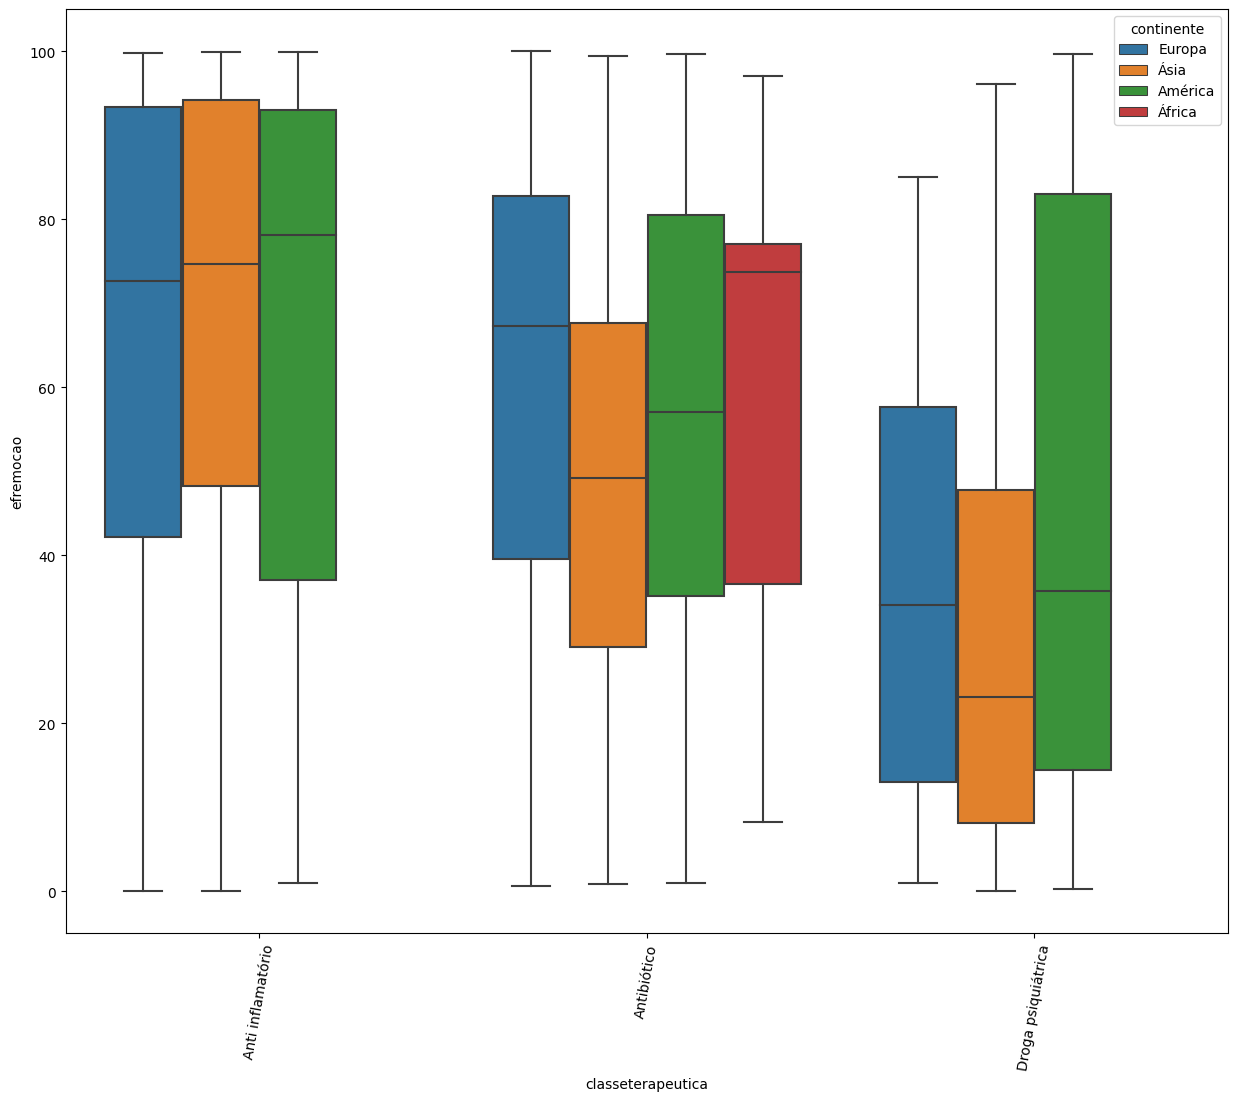

In [ ]:
# Ef. de remoção + por continente

plt.figure(figsize=(15,12))
sns.boxplot(x='classeterapeutica', y='efremocao', hue = 'continente', data=df_efpos)
plt.xticks(rotation=80)

(array([0, 1, 2]),
 [Text(0, 0, 'Droga psiquiátrica'),
  Text(1, 0, 'Antibiótico'),
  Text(2, 0, 'Anti inflamatório')])

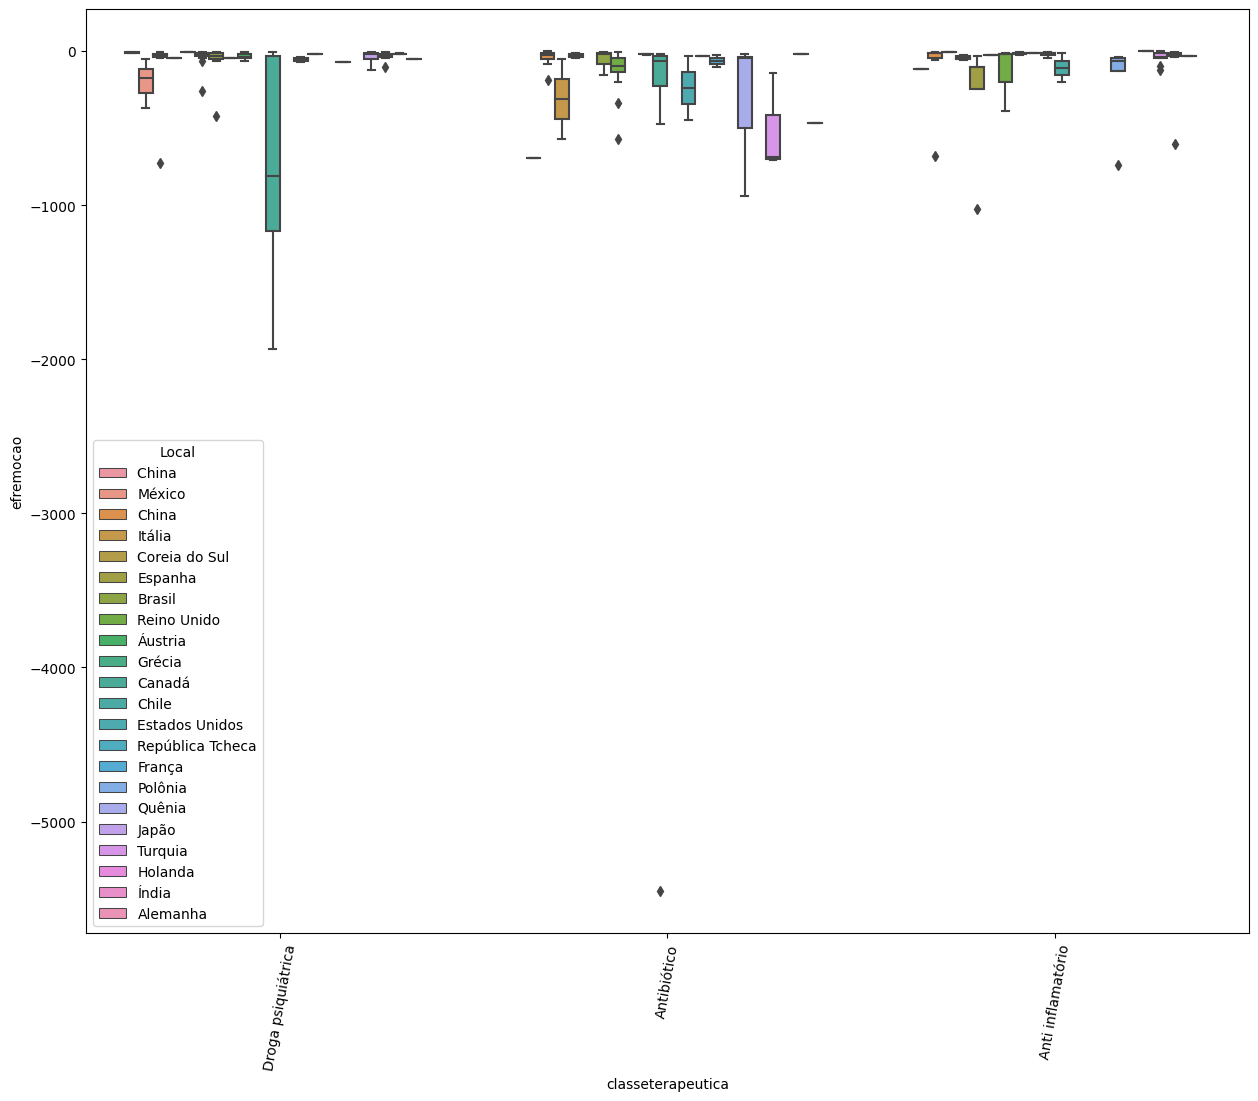

In [ ]:
# Boxplot apenas para as ef. de remoção negativas

plt.figure(figsize=(15,12))
sns.boxplot(x='classeterapeutica', y='efremocao', hue = 'Local', data=df_efneg)
plt.xticks(rotation=80)

In [ ]:
# Saber os top 10 países mais recorrentes

n = 10
literatura['Local'].value_counts()[:n].sort_values(ascending=False)

China             157
Japão             109
Canadá             92
Brasil             74
Turquia            72
Espanha            69
Reino Unido        59
Índia              38
Estados Unidos     38
Holanda            32
Name: Local, dtype: int64

In [ ]:
# Saber os 10 países mais recorrentes na base de ef. de rem. negativa

n = 10
df_efneg['Local'].value_counts()[:n].sort_values(ascending=False)

# df_efneg['Local'].value_counts().nlargest(10) # opção 02

China          26
Turquia        26
Canadá         23
Reino Unido    20
Espanha        18
Brasil         15
Japão           9
Holanda         9
Áustria         8
Polônia         6
Name: Local, dtype: int64

In [ ]:
# Saber os 10 países mais recorrentes na base de ef. de rem. positiva

n = 10
df_efpos['Local'].value_counts()[:n].sort_values(ascending=False)

China             131
Japão             100
Canadá             69
Brasil             59
Espanha            51
Turquia            46
Reino Unido        39
Índia              35
Estados Unidos     33
Itália             27
Name: Local, dtype: int64

In [ ]:
# Agora, extrair os top 10 países mais recorrentes na base.

paises = ['China', 'Japão', 'Canadá', 'Brasil', 'Espanha', 'Turquia', 'Reino Unido', 'Índia', 'Estados Unidos', 'Itália']

df_efpos_top10 = df_efpos[df_efpos['Local'].isin(paises)]

In [ ]:
df_efpos_top10.describe()

,cent,csai,efremocao
count,590.000000,590.000000,590.000000
mean,4357.253966,577.688492,58.036898
std,18104.384430,2004.870605,29.792174
min,0.900000,0.100000,0.000000
25%,127.000000,34.025000,34.867500
50%,370.500000,110.500000,60.780000
75%,1177.000000,343.500000,85.390000
max,211380.000000,28147.000000,99.930000


(array([0, 1, 2]),
 [Text(0, 0, 'Anti inflamatório'),
  Text(1, 0, 'Antibiótico'),
  Text(2, 0, 'Droga psiquiátrica')])

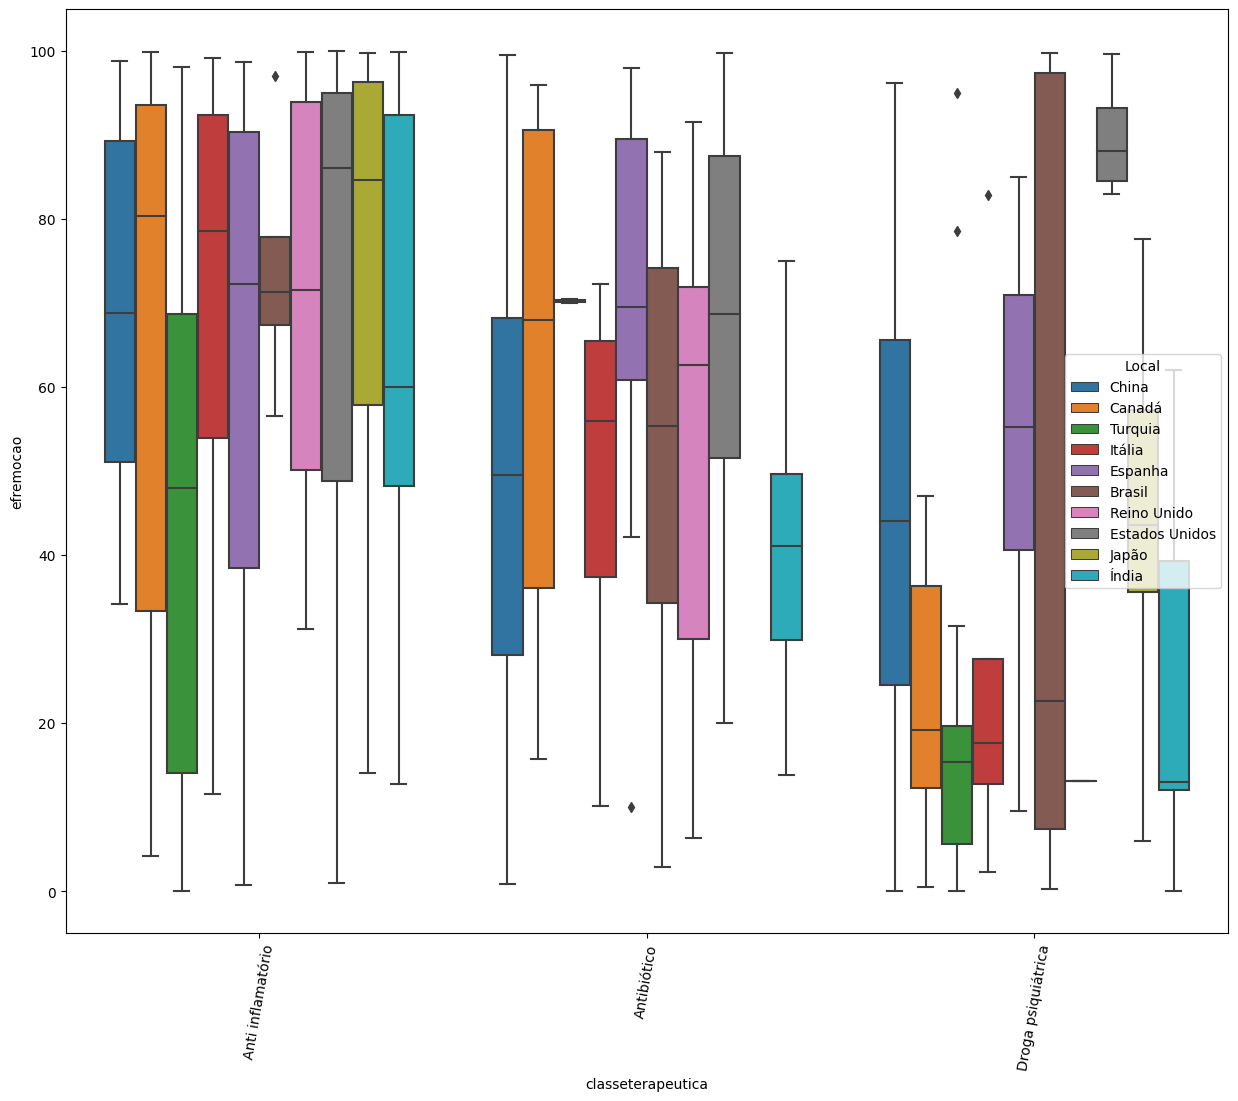

In [ ]:
# Boxplot para ef. de remoção + para os 10 países que mais aparecem na base - plotar legednda fora do gráfico

plt.figure(figsize=(15,12))
sns.boxplot(x='classeterapeutica', y='efremocao', hue = 'Local', data=df_efpos_top10)
plt.xticks(rotation=80)

(array([0, 1, 2]),
 [Text(0, 0, 'Anti inflamatório'),
  Text(1, 0, 'Antibiótico'),
  Text(2, 0, 'Droga psiquiátrica')])

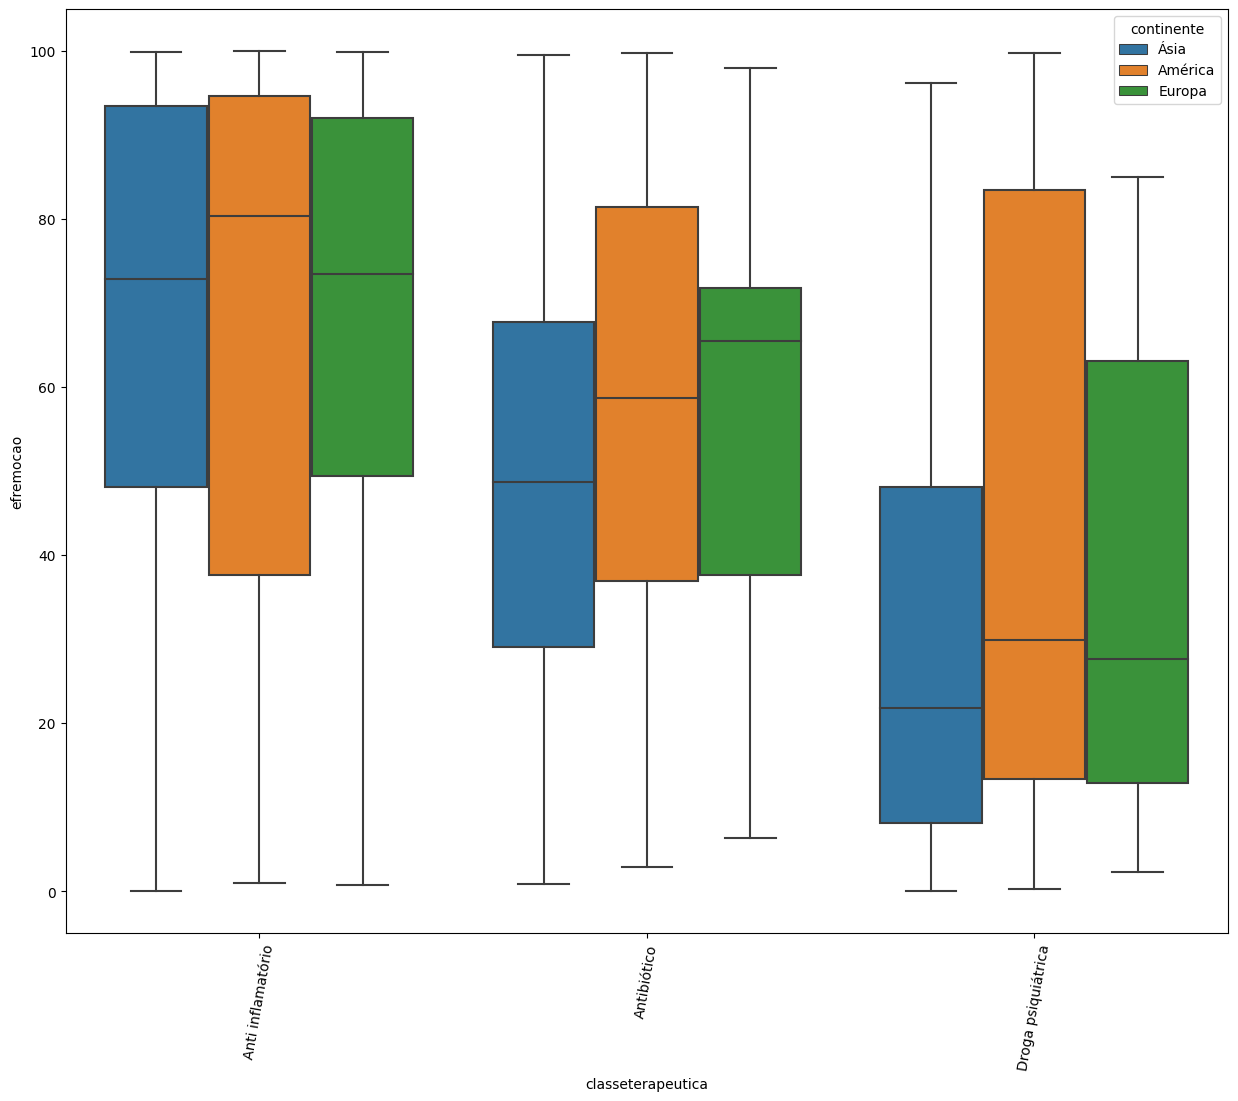

In [ ]:
# Boxplot para ef. de remoção + para os 10 países POR CONTINENTE que mais aparecem na base - plotar legednda fora do gráfico

plt.figure(figsize=(15,12))
sns.boxplot(x='classeterapeutica', y='efremocao', hue = 'continente', data=df_efpos_top10)
plt.xticks(rotation=80)

Comparação entre os países top 10 x todos os países

In [ ]:
df_efpos.describe()

,cent,csai,efremocao
count,742.000000,742.000000,742.000000
mean,4513.318356,678.248113,58.029609
std,19086.756611,3060.322809,30.532912
min,0.320000,0.000000,0.000000
25%,141.000000,39.025000,34.232500
50%,387.500000,122.000000,61.150000
75%,1400.000000,340.000000,86.287500
max,260495.000000,64900.000000,100.000000


In [ ]:
df_efpos_top10.describe()

,cent,csai,efremocao
count,590.000000,590.000000,590.000000
mean,4357.253966,577.688492,58.036898
std,18104.384430,2004.870605,29.792174
min,0.900000,0.100000,0.000000
25%,127.000000,34.025000,34.867500
50%,370.500000,110.500000,60.780000
75%,1177.000000,343.500000,85.390000
max,211380.000000,28147.000000,99.930000


In [ ]:
literatura.describe()

,cent,csai,efremocao
count,940.000000,940.000000,940.000000
mean,3737.912968,877.338511,12.608851
std,17078.449212,4429.644037,228.530061
min,0.320000,0.000000,-5451.780000
25%,119.750000,47.075000,6.070000
50%,344.000000,152.000000,47.055000
75%,1169.250000,446.250000,80.262500
max,260495.000000,94230.000000,100.000000


Vale ressaltar que são 51 (antiinflamatorios)	64 (antibióticos)	83 (psiquiátricos) com ef. de remoção negativa.

In [ ]:
# Antibióticos com ef. de remoção negativa

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 60.0% of the points cannot be plac

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Sulfametoxazol '),
  Text(1, 0, 'Lincomicina'),
  Text(2, 0, 'Trimetoprima'),
  Text(3, 0, 'Azitromicina'),
  Text(4, 0, 'Eritromicina'),
  Text(5, 0, 'Ácido mefenâmico'),
  Text(6, 0, 'Sulfametoxazol'),
  Text(7, 0, 'Ciprofloxacino'),
  Text(8, 0, 'Claritromicina'),
  Text(9, 0, 'Clindamicina'),
  Text(10, 0, 'Roxitromicina'),
  Text(11, 0, 'Sulfapiridina'),
  Text(12, 0, 'Norfloxacino'),
  Text(13, 0, 'Carbamazepina'),
  Text(14, 0, 'Ofloxacino')])

<Figure size 1500x1200 with 0 Axes>

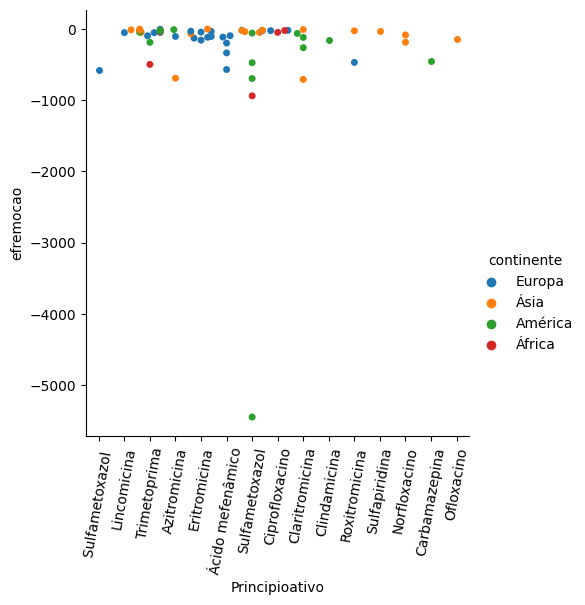

In [ ]:
df_antibioneg = df_efneg.query("classeterapeutica == 'Antibiótico'") # selecionando só antibióticos

plt.figure(figsize=(15,12))
sns.catplot(x='Principioativo', y='efremocao', kind = 'swarm', hue = 'continente', data=df_antibioneg)
plt.xticks(rotation=80)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'Carbamazepina'),
  Text(1, 0, 'Sulpirida'),
  Text(2, 0, 'Bromazepam'),
  Text(3, 0, 'Sulfametoxazol '),
  Text(4, 0, 'Diclofenaco'),
  Text(5, 0, 'Lincomicina'),
  Text(6, 0, 'Diazepam '),
  Text(7, 0, 'Trimetoprima'),
  Text(8, 0, 'Tramadol'),
  Text(9, 0, 'Azitromicina'),
  Text(10, 0, 'Ibuprofeno'),
  Text(11, 0, 'Eritromicina'),
  Text(12, 0, 'Ácido mefenâmico'),
  Text(13, 0, 'Sulfametoxazol'),
  Text(14, 0, 'Ciprofloxacino'),
  Text(15, 0, 'Claritromicina'),
  Text(16, 0, 'Ketoprofeno'),
  Text(17, 0, 'Naproxeno'),
  Text(18, 0, 'Clindamicina'),
  Text(19, 0, 'Indometacino'),
  Text(20, 0, 'Roxitromicina'),
  Text(21, 0, 'Sulfapiridina'),
  Text(22, 0, 'Antipirina'),
  Text(23, 0, 'Norfloxacino'),
  Text(24, 0, 'Oxazepam'),
  Text(25, 0, 'Ácido Mefenâmico'),
  Text(26, 0, 'Diazepam'),
  Text(27, 0, 'Ofloxacino'),
  Text(28, 0, 'Parac

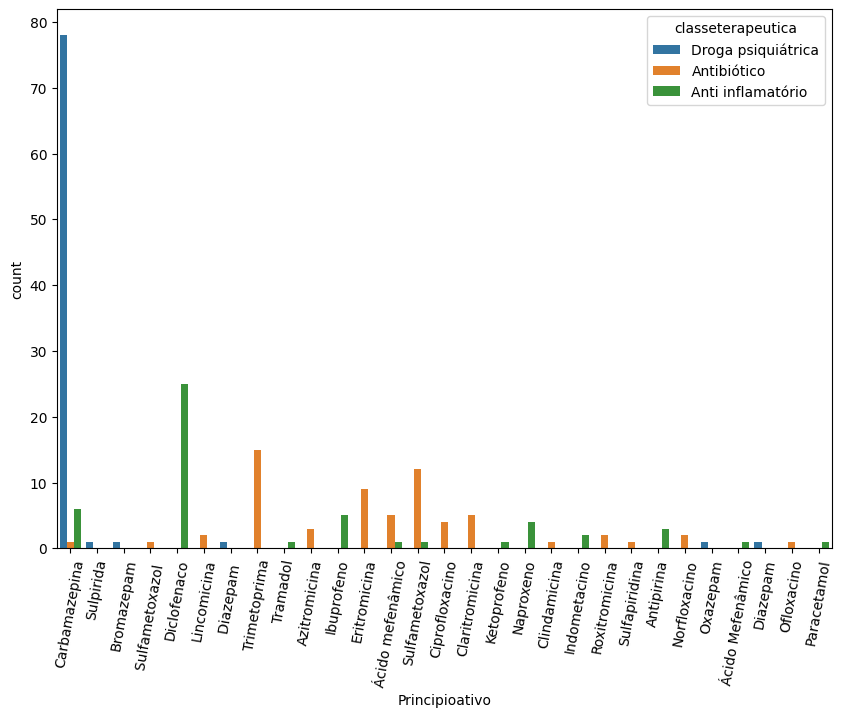

In [ ]:
# Verificar quais os PA's anitbioticos que estão com ef de remocao < 0

df_efneg['Principioativo'].value_counts().sort_values(ascending=False) # OK

# Visualizando

plt.figure(figsize=(10,7))
sns.countplot(x = df_efneg['Principioativo'], hue = df_efneg['classeterapeutica'])
plt.xticks(rotation=80)

In [ ]:
# Pegar para a base positiva e excluir valores discrepantes, usando a regra interquartil por coluna numérica

# Cálculo de IQR

Q1 = df_efpos['cent'].quantile(.25)

Q3 = df_efpos['cent'].quantile(.75)

IQR = Q3 - Q1

IQR

1259.0

In [ ]:
# Limite superior

LS = Q3 + 1.5*IQR
LI = Q1 - 1.5*IQR

print("Limite superior:", LS)
print("Limite inferior:", LI)

Limite superior: 3288.5
Limite inferior: -1747.5


In [ ]:
# Removendo os valores que estão fora desse range

# Fazendo uma cópia do datset inicial

df_efpos_limpos = df_efpos.copy()

# Removendo os outliers
df_efpos_limpos.drop(df_efpos_limpos[df_efpos_limpos['cent'] > 3288.5].index,axis =0, inplace = True)

Criando categorias de ef. de remoção e verificando para cada PA (ou classe) qual a de maior recorrência. Vou criar uma escala PROVISÓRIA, da cabeça, mas DEPOIS PROCURAR nos artigos se algum deles apresenta uma categoria assim para remoção de fármacos.


Com base na classificação de remoção de DBO e minha cabeça
0 - 20,9% - desprezível
21 - 40,9% - baixa
41 - 59,9 - moderada
60% a 79,9% - convencional e > 80% avançado

In [ ]:
# Criando nova coluna de Categoria de remoção

condicao = [
    (df_efpos_limpos['efremocao'] >= 0) & (df_efpos_limpos['efremocao'] <= 20.9),
    (df_efpos_limpos['efremocao'] >= 21) & (df_efpos_limpos['efremocao'] <= 40.9),
    (df_efpos_limpos['efremocao'] >= 41) & (df_efpos_limpos['efremocao'] <= 59.9),
    (df_efpos_limpos['efremocao'] >= 60) & (df_efpos_limpos['efremocao'] <= 79.9),
    (df_efpos_limpos['efremocao'] >= 80)
    ]

valores = ['Desprezível', 'Baixa', 'Moderada', 'Convencional', 'Avançada']

df_efpos_limpos['categoria_remocao'] = np.select(condicao, valores)

(array([0, 1, 2]),
 [Text(0, 0, 'Europa'), Text(1, 0, 'Ásia'), Text(2, 0, 'América')])

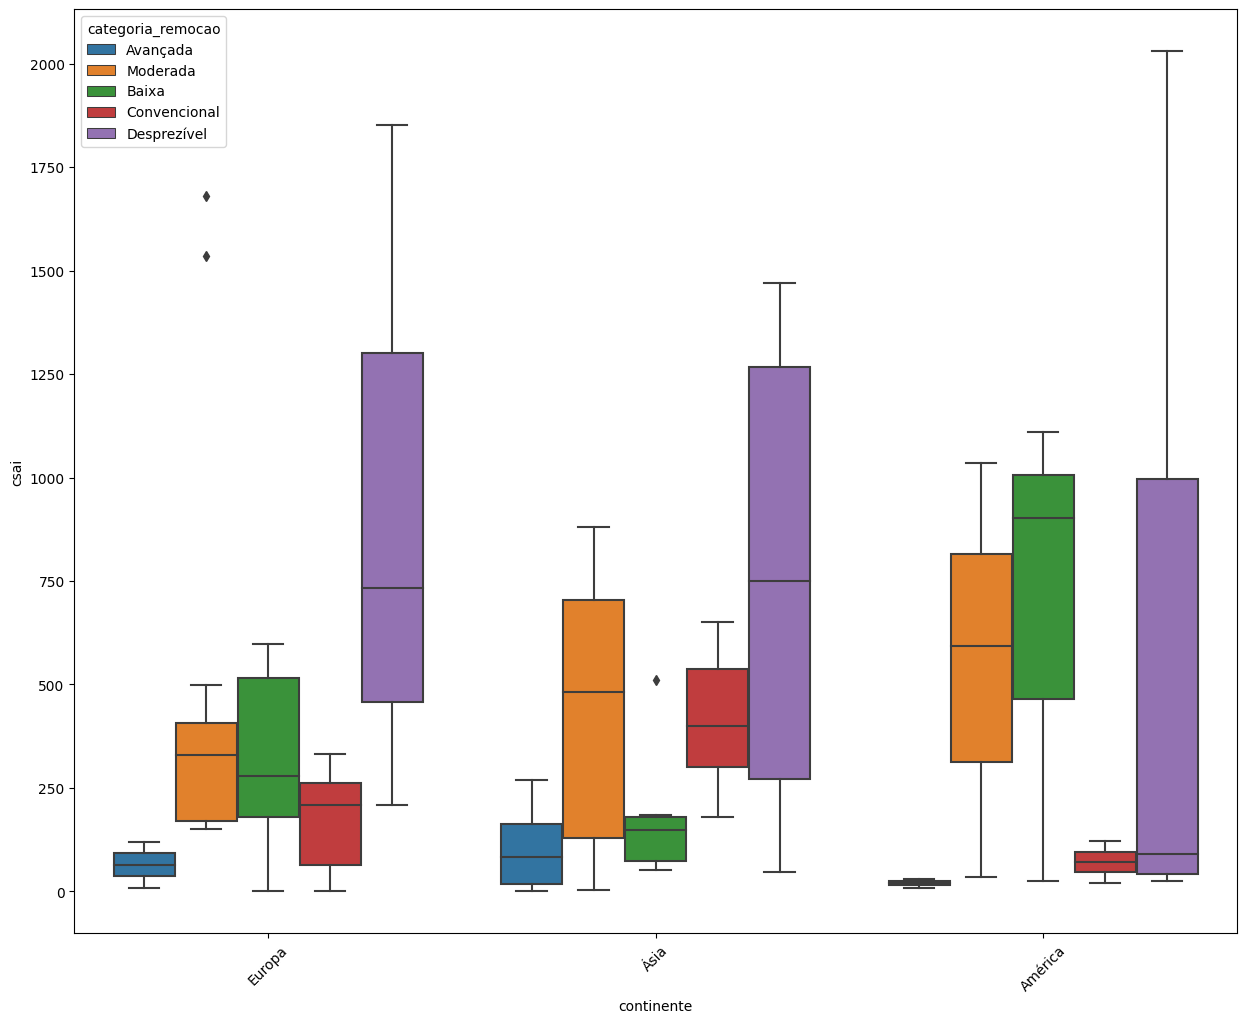

In [ ]:
# boxplot ef de remoção x PA x categoria de remoção

df_antif = df_efpos_limpos.query("classeterapeutica == 'Anti inflamatório'")
df_diclo = df_antif.query("Principioativo == 'Diclofenaco'")

plt.figure(figsize=(15,12))
sns.boxplot(x='continente', y='csai', hue = 'categoria_remocao', data=df_diclo)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'China'),
  Text(1, 0, 'Japão'),
  Text(2, 0, 'Coreia do Sul'),
  Text(3, 0, 'Índia'),
  Text(4, 0, 'Turquia')])

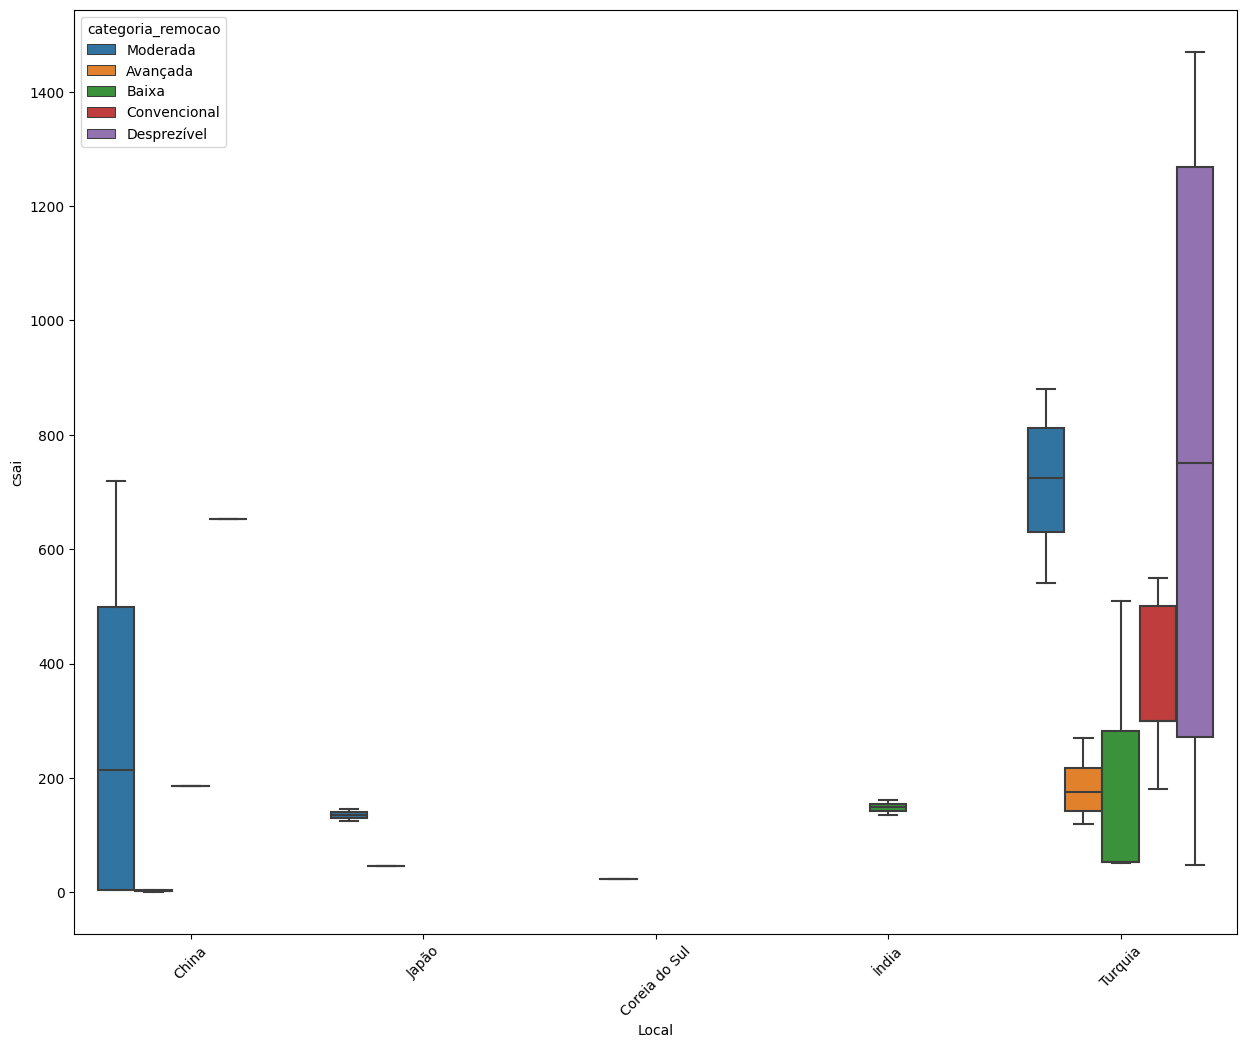

In [ ]:
# boxplot ef de remoção x PA x categoria de remoção

df_antif = df_efpos_limpos.query("classeterapeutica == 'Anti inflamatório'")
df_asia = df_antif.query("continente == 'Ásia'")
df_diclo = df_asia.query("Principioativo == 'Diclofenaco'")

plt.figure(figsize=(15,12))
sns.boxplot(x='Local', y='csai', hue = 'categoria_remocao', data=df_diclo)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Brasil'),
  Text(1, 0, 'Estados Unidos'),
  Text(2, 0, 'México'),
  Text(3, 0, 'Canadá')])

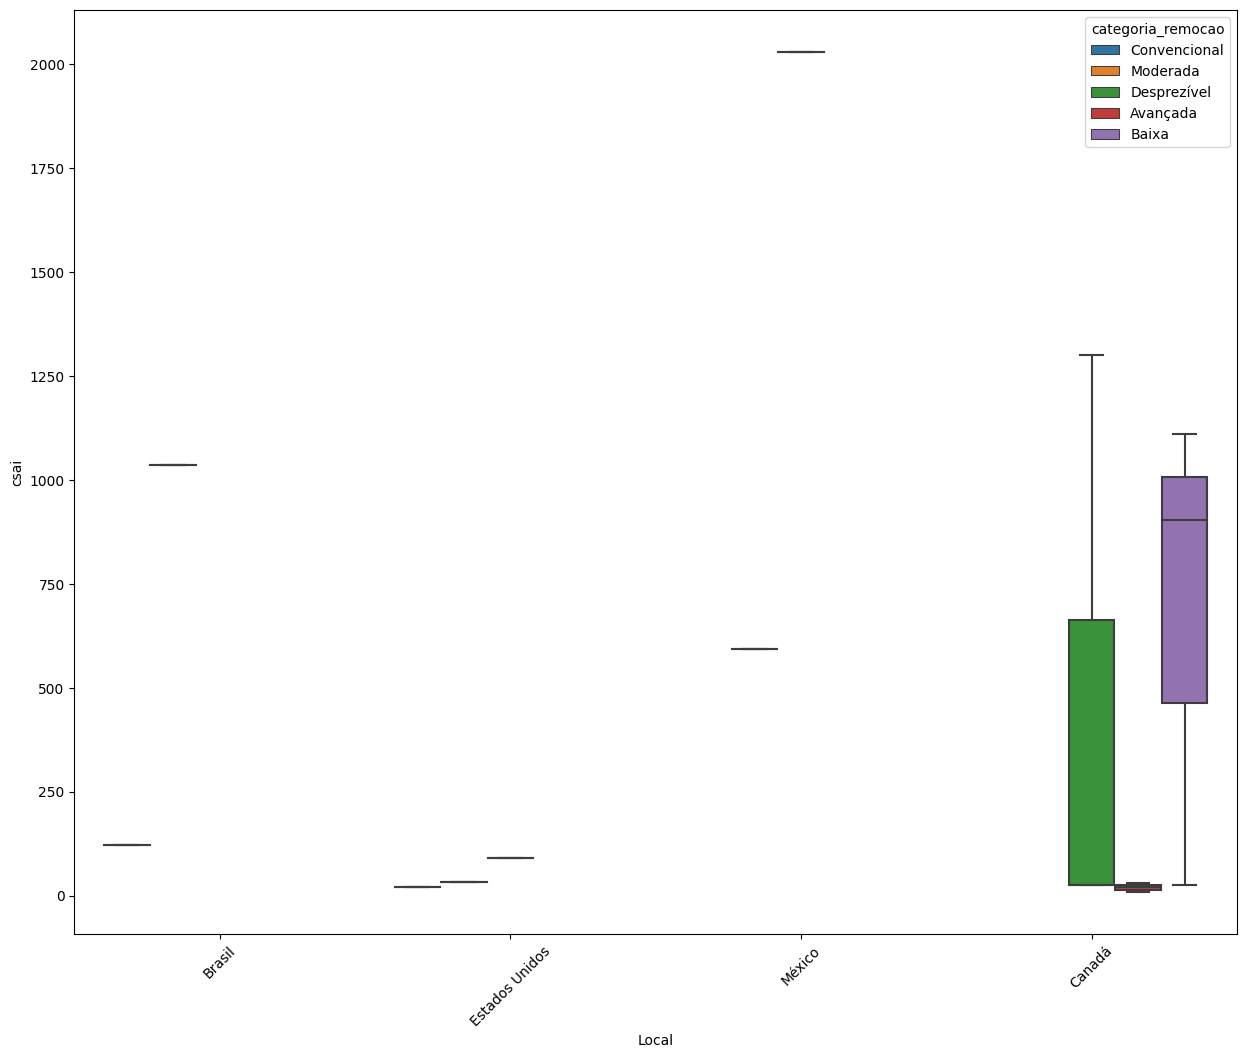

In [ ]:
# boxplot ef de remoção x PA x categoria de remoção

df_antif = df_efpos_limpos.query("classeterapeutica == 'Anti inflamatório'")
df_amer = df_antif.query("continente == 'América'")
df_diclo_amer = df_amer.query("Principioativo == 'Diclofenaco'")

plt.figure(figsize=(15,12))
sns.boxplot(x='Local', y='csai', hue = 'categoria_remocao', data=df_diclo_amer)
plt.xticks(rotation = 45)

Padronizar a técnica - reduzir a quantidade de técnicas diferentes

## Visualizando a distribuição de cada classe terapêutica separada e depois por PA daquela classe

**Antibióticos**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Eritromicina'),
  Text(1, 0, 'Sulfametoxazol'),
  Text(2, 0, 'Ampicilina'),
  Text(3, 0, 'Trimetoprima'),
  Text(4, 0, 'Claritromicina'),
  Text(5, 0, 'Roxitromicina'),
  Text(6, 0, 'Azitromicina'),
  Text(7, 0, 'Moxifloxacina'),
  Text(8, 0, 'Ofloxacino'),
  Text(9, 0, 'Norfloxacino'),
  Text(10, 0, 'Sulfametoxazol '),
  Text(11, 0, 'Lincomicina'),
  Text(12, 0, 'Metronidazol'),
  Text(13, 0, 'Ciprofloxacino '),
  Text(14, 0, 'Norfloxacino '),
  Text(15, 0, 'Cefalexina '),
  Text(16, 0, 'Tetraciclina'),
  Text(17, 0, 'Ácido mefenâmico'),
  Text(18, 0, 'Ciprofloxacino'),
  Text(19, 0, 'Amoxicilina'),
  Text(20, 0, 'Enrofloxacino'),
  Text(21, 0, 'Doxiciclina'),
  Text(22, 0, 'Oxitetraciclina'),
  Text(23, 0, 'sulfadiazina'),
  Text(24, 0, 'Levofloxacino'),
  Text(25, 0, 'Sulfapiridina'),
  Text(26, 0, 'Sulfasalasina'),
  Text(27

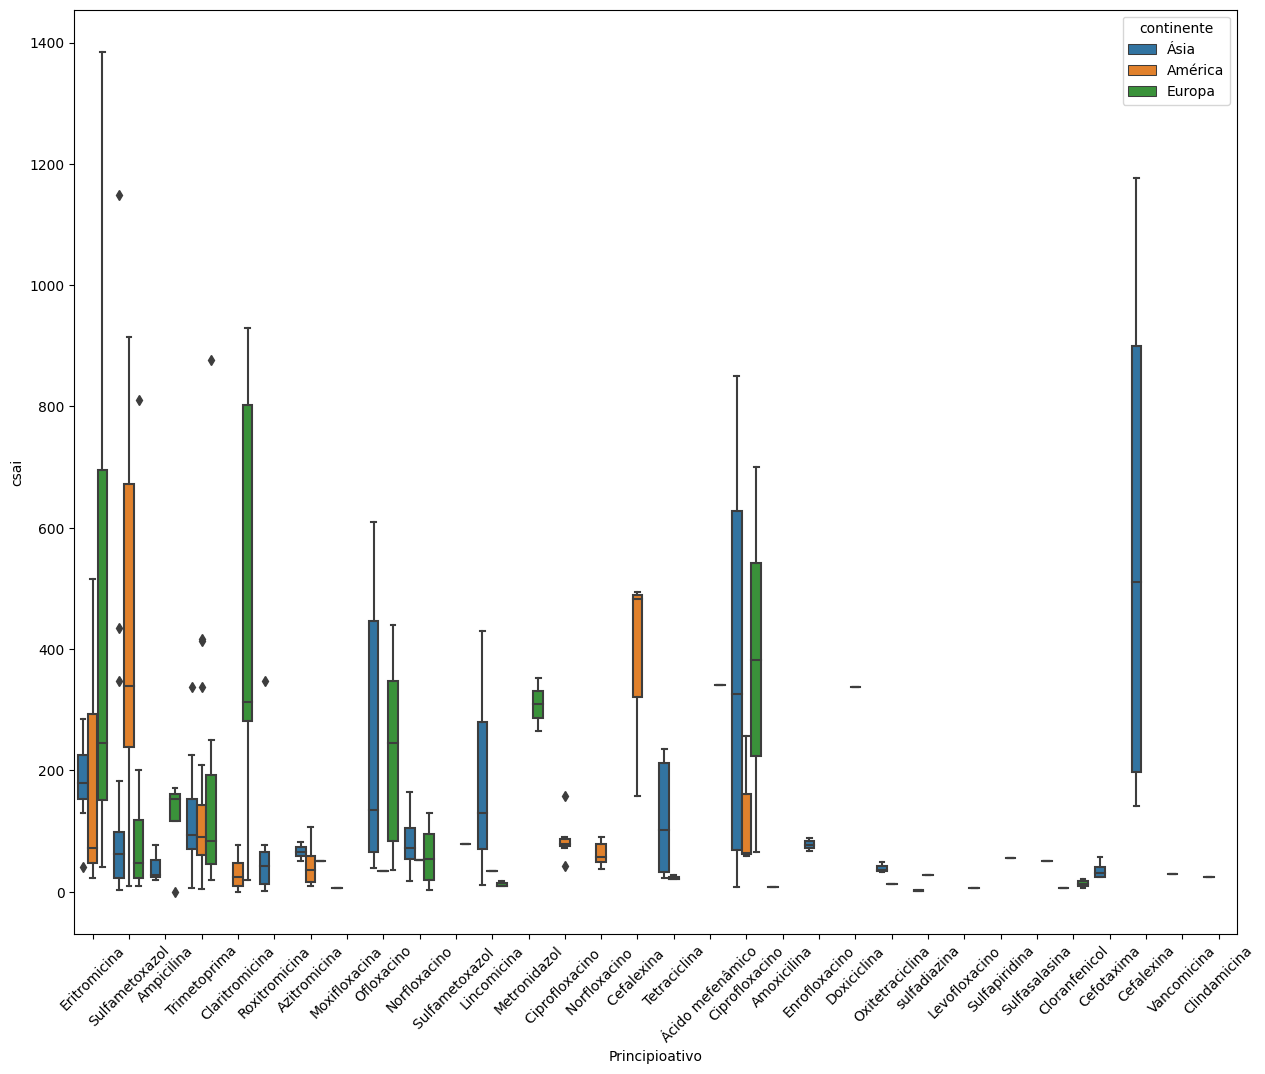

In [ ]:
# Antibióticos

df_antibio = df_efpos_limpos.query("classeterapeutica == 'Antibiótico'") # selecionando só antibióticos da base com ef. remoção > 0

plt.figure(figsize=(15,12))
sns.boxplot(x='Principioativo', y='csai', hue = 'continente', data=df_antibio)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Eritromicina'),
  Text(1, 0, 'Sulfametoxazol'),
  Text(2, 0, 'Ampicilina'),
  Text(3, 0, 'Trimetoprima'),
  Text(4, 0, 'Claritromicina'),
  Text(5, 0, 'Roxitromicina'),
  Text(6, 0, 'Azitromicina'),
  Text(7, 0, 'Moxifloxacina'),
  Text(8, 0, 'Ofloxacino'),
  Text(9, 0, 'Norfloxacino'),
  Text(10, 0, 'Sulfametoxazol '),
  Text(11, 0, 'Lincomicina'),
  Text(12, 0, 'Metronidazol'),
  Text(13, 0, 'Ciprofloxacino '),
  Text(14, 0, 'Norfloxacino '),
  Text(15, 0, 'Cefalexina '),
  Text(16, 0, 'Tetraciclina'),
  Text(17, 0, 'Ácido mefenâmico'),
  Text(18, 0, 'Ciprofloxacino'),
  Text(19, 0, 'Amoxicilina'),
  Text(20, 0, 'Enrofloxacino'),
  Text(21, 0, 'Doxiciclina'),
  Text(22, 0, 'Oxitetraciclina'),
  Text(23, 0, 'sulfadiazina'),
  Text(24, 0, 'Levofloxacino'),
  Text(25, 0, 'Sulfapiridina'),
  Text(26, 0, 'Sulfasalasina'),
  Text(27

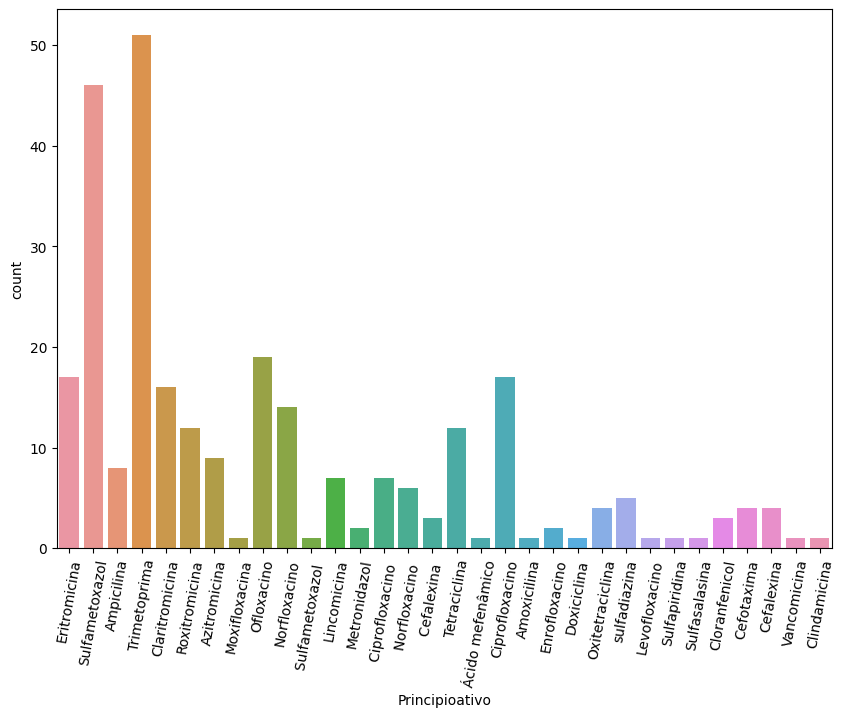

In [ ]:
# Visualizando

plt.figure(figsize=(10,7))
sns.countplot(x = df_antibio['Principioativo'])
plt.xticks(rotation=80)

In [ ]:
# Verificar qtde de obs apenas para os antibióticos de interesse

df_antibio_main = df_antibio[(df_antibio['Principioativo']== 'Amoxicilina')|
                             (df_antibio['Principioativo']== 'Cefalexina')|
                             (df_antibio['Principioativo']== 'Ciprofloxacino')|
                             (df_antibio['Principioativo']== 'Norfloxacino')|
                             (df_antibio['Principioativo']== 'Claritromicina')|
                             (df_antibio['Principioativo']== 'Ofloxacino')|
                             (df_antibio['Principioativo']== 'Ampicilina')
                             ]

df_antibio_main['Principioativo'].value_counts().sum() # Apenas 79 observações. Usar o mesmo artifício da carbamazepina

79

In [ ]:
# Salvando a base em formato .csv, essa basse será ajustada no drive para a inserção das concentrações anvisa.

df_antibio_main.to_csv('antibioticos.csv')

In [ ]:
# Separando apenas dados com % de remoção > 0

plt.figure(figsize=(15,12))
sns.relplot(x='cent', y='csai', hue = 'Continente', size = 'efremocao', data=df_antibiotio_main).fig.suptitle('Obs com ef. de remoção positivas')

- Base **df_antibio_main** vou salvar e fazer download (será a base que vou usar pro modelo de antibióticos) - ok

- Fazer a inserção das concentrações de entrada da ANVISA e replicação anual.



# Padronizando os tipos de técnicas.


In [ ]:
# Importando os dados da literatura
antibioticos = pd.read_csv("/content/sample_data/antibioticos2 - antibioticos.csv", sep = ',', low_memory=False)
antibioticos

,ano,cent_anvisa,qt vendida,n por un vendida,Principioativo,classeterapeutica,cent,csai,efremocao,Fatorexcrecao,massatot_kg_anual,tecnica,Local,continente
0,2014,937.141552,21743,245832,Ampicilina,Antibiótico,430.00,0.00,100.00,0.40,164.429000,digestor anaeróbio tanque anóxico,Portugal,Europa
1,2014,957.342813,99588,1216082,Claritromicina,Antibiótico,0.32,0.31,3.00,0.20,394.783250,tratamentoprimário floculação coagulação sedi...,Colômbia,América
2,2014,2.583672,15026,53430,Ofloxacino,Antibiótico,345.90,57.90,82.80,0.90,0.225390,Lodo ativado,China,Ásia
3,2014,7611.550793,178115,913196,Norfloxacino,Antibiótico,203.00,30.40,85.00,0.70,895.989200,Lodo ativado,China,Ásia
4,2014,957.342813,99588,1216082,Claritromicina,Antibiótico,1012.00,281.60,72.17,0.20,394.783250,Lodo ativado,Itália,Europa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,2020,19341.487195,408037,1537974,Ciprofloxacino,Antibiótico,2789.00,257.00,90.78,0.64,2525.340895,Lodo ativado,Estados Unidos,América
549,2020,564.383927,50688,525202,Claritromicina,Antibiótico,136.00,66.00,51.47,0.20,260.251900,Lodo ativado,Estados Unidos,América
550,2020,3208.227213,77106,489184,Norfloxacino,Antibiótico,1500.00,25.00,98.33,0.70,381.315600,Lodo ativado,Alemanha,Europa
551,2020,3.134948,16288,53785,Ofloxacino,Antibiótico,180.00,68.00,62.22,0.90,0.244320,Lodo ativado,Alemanha,Europa


In [ ]:
antibioticos.tecnica.value_counts()

Lodo ativado                                              413
Terciário SAGR                                             56
Biofiltro                                                  21
Lodo ativado CMB BAC                                       21
UASB Lodo ativado                                          14
Terciário carvão ativo                                     14
digestor anaeróbio tanque anóxico                           7
tratamentoprimário floculação  coagulação sedimentação      7
Name: tecnica, dtype: int64

Text(0.5, 0.98, 'Conc x entrada x ef. de remoção')

<Figure size 1500x1200 with 0 Axes>

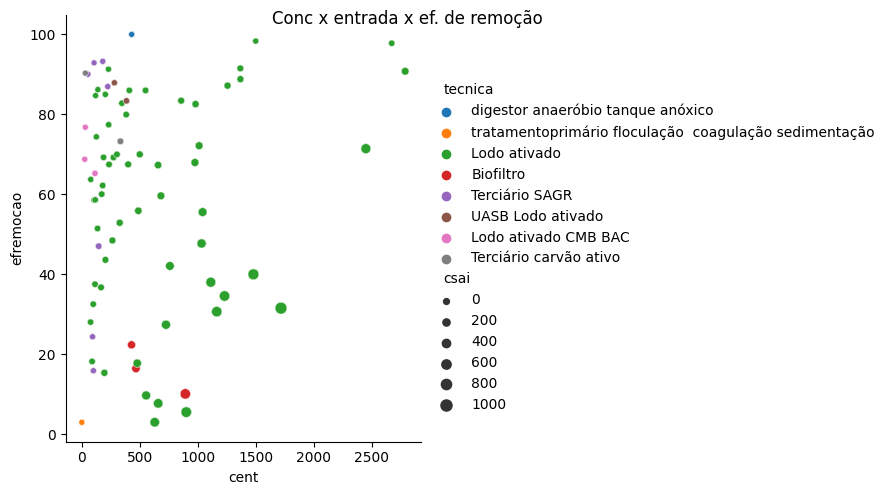

In [ ]:
# Considerando a ef. de remoção

plt.figure(figsize=(15,12))
sns.relplot(x='cent', y='efremocao', hue = 'tecnica', size='csai', data=antibioticos).fig.suptitle('Conc x entrada x ef. de remoção x técnica')

In [ ]:
# Criando nova coluna de Categoria de remoção (mesma coisa que fiz lá em cima)

condicao = [
    (antibioticos['efremocao'] >= 0) & (antibioticos['efremocao'] <= 20.9),
    (antibioticos['efremocao'] >= 21) & (antibioticos['efremocao'] <= 40.9),
    (antibioticos['efremocao'] >= 41) & (antibioticos['efremocao'] <= 59.9),
    (antibioticos['efremocao'] >= 60) & (antibioticos['efremocao'] <= 79.9),
    (antibioticos['efremocao'] >= 80)
    ]

valores = ['Desprezível', 'Baixa', 'Moderada', 'Convencional', 'Avançada']

antibioticos['categoria_remocao'] = np.select(condicao, valores)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Ampicilina'),
  Text(1, 0, 'Claritromicina'),
  Text(2, 0, 'Ofloxacino'),
  Text(3, 0, 'Norfloxacino'),
  Text(4, 0, 'Ciprofloxacino'),
  Text(5, 0, 'Amoxicilina'),
  Text(6, 0, 'Cefalexina')])

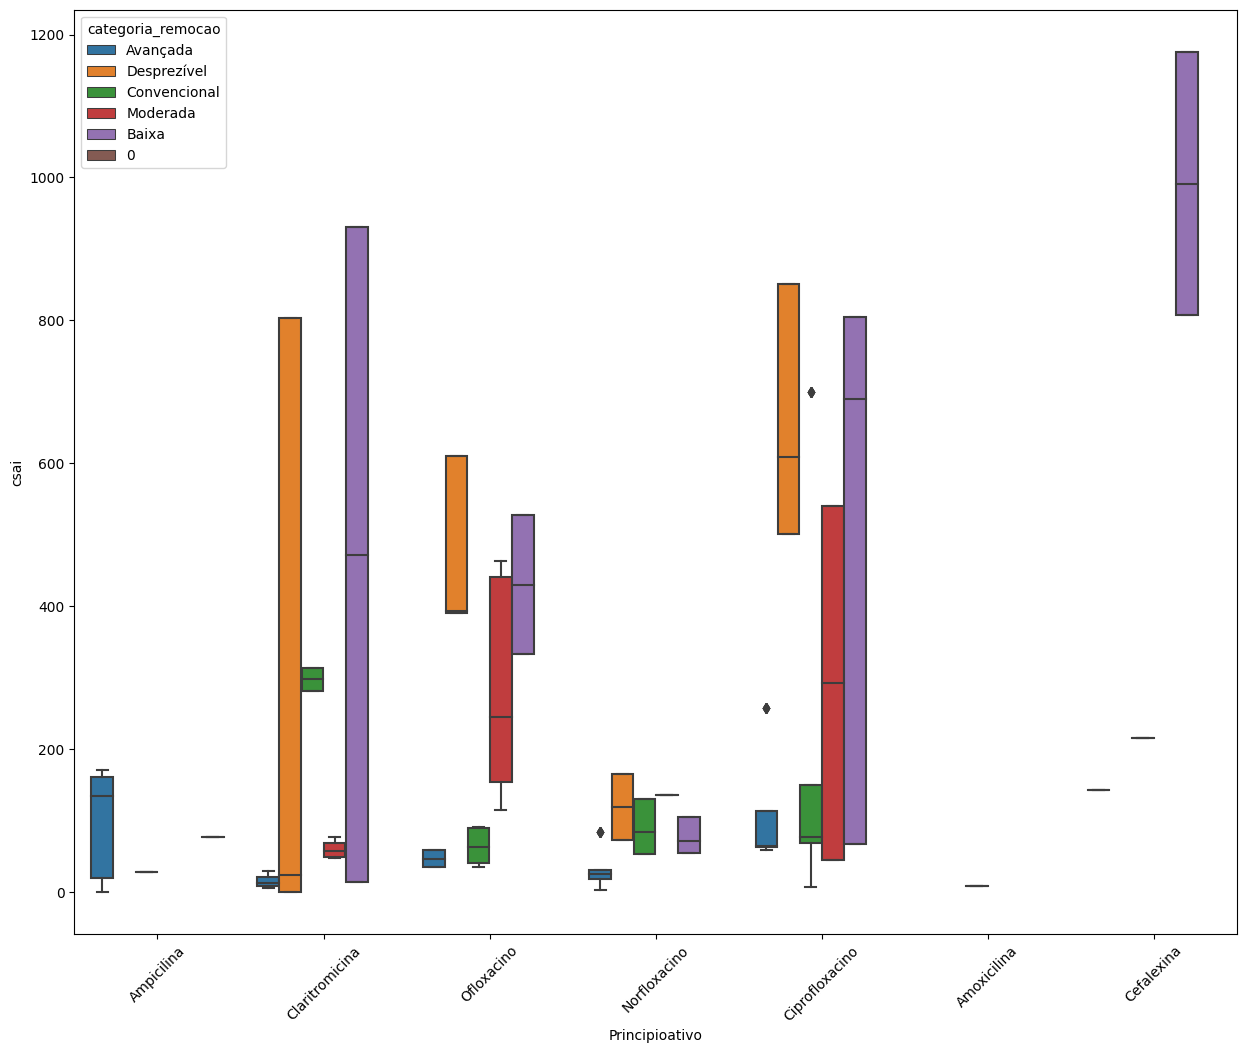

In [ ]:
# boxplot ef de remoção x PA x categoria de remoção

plt.figure(figsize=(15,12))
sns.boxplot(x='Principioativo', y='csai', hue = 'categoria_remocao', data=antibioticos)
plt.xticks(rotation = 45)

(array([0, 1, 2]),
 [Text(0, 0, 'Europa'), Text(1, 0, 'América'), Text(2, 0, 'Ásia')])

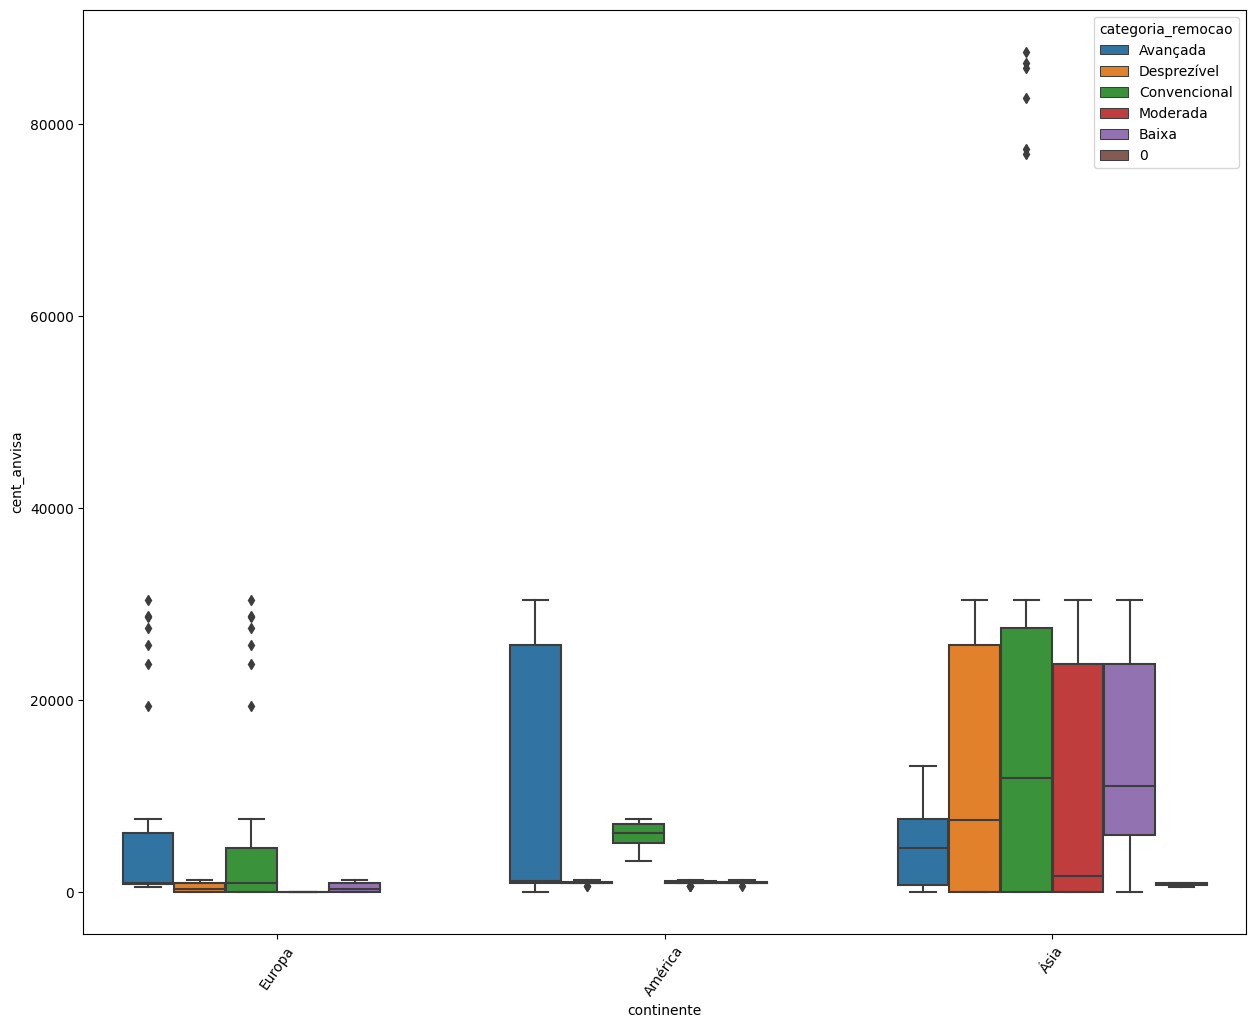

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(x='continente', y='cent_anvisa', hue = 'categoria_remocao',data=antibioticos)
plt.xticks(rotation = 55)

In [ ]:
antibioticos.describe()

,ano,cent_anvisa,qt vendida,n por un vendida,cent,csai,efremocao,Fatorexcrecao,massatot_kg_anual
count,553.000000,553.000000,5.530000e+02,5.530000e+02,553.000000,553.000000,553.000000,553.000000,553.000000
mean,2017.000000,8465.818960,2.345516e+05,1.226841e+06,556.233165,211.667595,58.589367,0.576962,1360.242925
std,2.001811,12969.604362,2.954786e+05,2.303742e+06,590.227595,264.161720,27.501613,0.260597,2007.737680
min,2014.000000,2.583672,1.006800e+04,5.343000e+04,0.320000,0.000000,3.000000,0.200000,0.225390
25%,2015.000000,529.530151,1.804500e+04,1.268530e+05,136.000000,39.600000,36.750000,0.200000,80.012000
50%,2017.000000,1076.335001,9.730200e+04,9.084710e+05,333.000000,83.000000,65.260000,0.640000,403.599600
75%,2019.000000,12357.317493,4.080370e+05,1.537974e+06,857.000000,281.600000,83.430000,0.700000,2525.340895
max,2020.000000,87508.734396,1.535072e+06,2.172018e+07,2789.000000,1176.000000,100.000000,0.900000,17363.087100


In [ ]:
# Estabelecer níveis da variável concent. de saída (csai):  até 100, entre 100 - 500 e acima de 500 (baixo, médio, alto)

condicao = [
    (antibioticos['csai'] >= 0) & (antibioticos['csai'] <= 100),
    (antibioticos['csai'] >= 100.1) & (antibioticos['csai'] <= 500),
    (antibioticos['csai'] >= 500.1)
    ]

valores = ['Baixa', 'Média', 'Alta']

antibioticos['categoria_csai'] = np.select(condicao, valores)

In [ ]:
antibioticos

,ano,cent_anvisa,qt vendida,n por un vendida,Principioativo,classeterapeutica,cent,csai,efremocao,Fatorexcrecao,massatot_kg_anual,tecnica,Local,continente,categoria_csai
0,2014,937.141552,21743,245832,Ampicilina,Antibiótico,430.00,0.00,100.00,0.40,164.429000,digestor anaeróbio tanque anóxico,Portugal,Europa,Baixa
1,2014,957.342813,99588,1216082,Claritromicina,Antibiótico,0.32,0.31,3.00,0.20,394.783250,tratamentoprimário floculação coagulação sedi...,Colômbia,América,Baixa
2,2014,2.583672,15026,53430,Ofloxacino,Antibiótico,345.90,57.90,82.80,0.90,0.225390,Lodo ativado,China,Ásia,Baixa
3,2014,7611.550793,178115,913196,Norfloxacino,Antibiótico,203.00,30.40,85.00,0.70,895.989200,Lodo ativado,China,Ásia,Baixa
4,2014,957.342813,99588,1216082,Claritromicina,Antibiótico,1012.00,281.60,72.17,0.20,394.783250,Lodo ativado,Itália,Europa,Média
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,2020,19341.487195,408037,1537974,Ciprofloxacino,Antibiótico,2789.00,257.00,90.78,0.64,2525.340895,Lodo ativado,Estados Unidos,América,Média
549,2020,564.383927,50688,525202,Claritromicina,Antibiótico,136.00,66.00,51.47,0.20,260.251900,Lodo ativado,Estados Unidos,América,Baixa
550,2020,3208.227213,77106,489184,Norfloxacino,Antibiótico,1500.00,25.00,98.33,0.70,381.315600,Lodo ativado,Alemanha,Europa,Baixa
551,2020,3.134948,16288,53785,Ofloxacino,Antibiótico,180.00,68.00,62.22,0.90,0.244320,Lodo ativado,Alemanha,Europa,Baixa


Fazer histograma das variáveis numéricas, fazer boxplot variaveis numericas x varia

## Reproduzindo gráficos de Toharudin et al. 2023

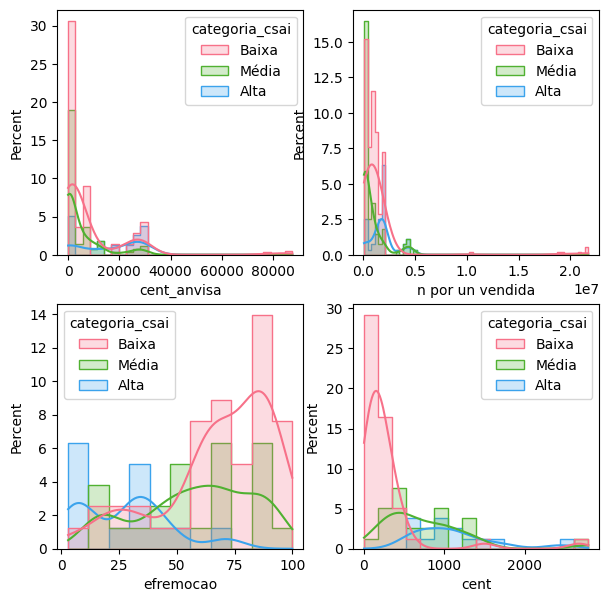

In [ ]:
# Histograma - variáveis independentes x nível da variável dependente (csai)
# fazer A ESCALA para cada variavel

#palette ={"Baixa": "orange", "Média": "mediumseagreen", "Alta": "royalblue"}

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=antibioticos, x="cent_anvisa", kde=True, stat="percent", element = 'step', hue="categoria_csai", palette= 'husl', ax=axs[0, 0])
sns.histplot(data=antibioticos, x="n por un vendida", kde=True, stat="percent", element = 'step', hue="categoria_csai", palette= 'husl', ax=axs[0, 1])
sns.histplot(data=antibioticos, x="efremocao", kde=True, stat="percent", element = 'step', hue="categoria_csai", palette= 'husl', ax=axs[1, 0])
sns.histplot(data=antibioticos, x="cent", kde=True, stat="percent", element = 'step', hue="categoria_csai",palette= 'husl',ax=axs[1, 1])

plt.show()

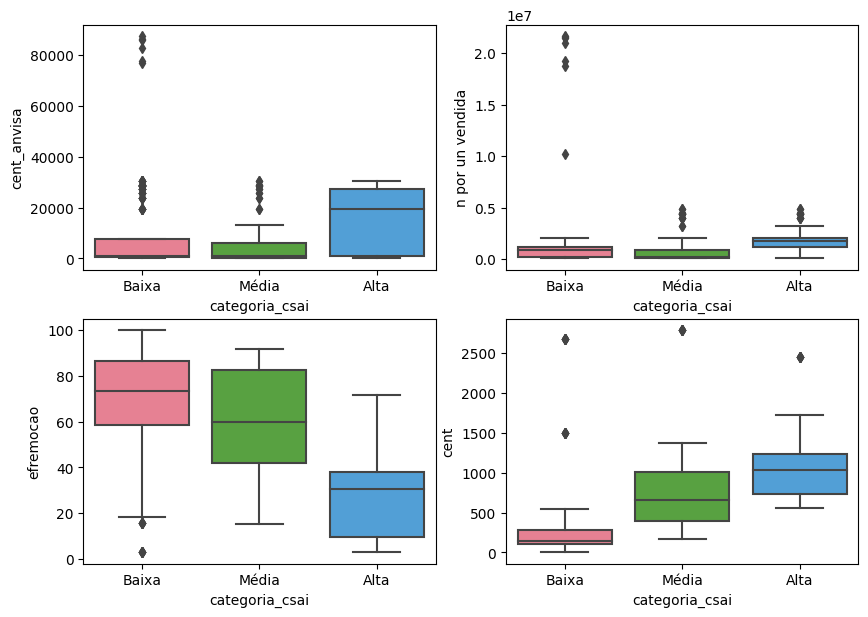

In [ ]:
# Boxplots

fig, axs = plt.subplots(2, 2, figsize=(10,7))

sns.boxplot(x='categoria_csai', y='cent_anvisa', orient = 'v',palette = "husl", data=antibioticos, ax=axs[0, 0])
sns.boxplot(x='categoria_csai', y='n por un vendida', orient = 'v',palette = "husl", data=antibioticos, ax=axs[0, 1])
sns.boxplot(x='categoria_csai', y='efremocao', orient = 'v',palette = "husl", data=antibioticos, ax=axs[1, 0])
sns.boxplot(x='categoria_csai', y='cent', orient = 'v',palette = "husl", data=antibioticos, ax=axs[1, 1])

plt.show()

<Axes: >

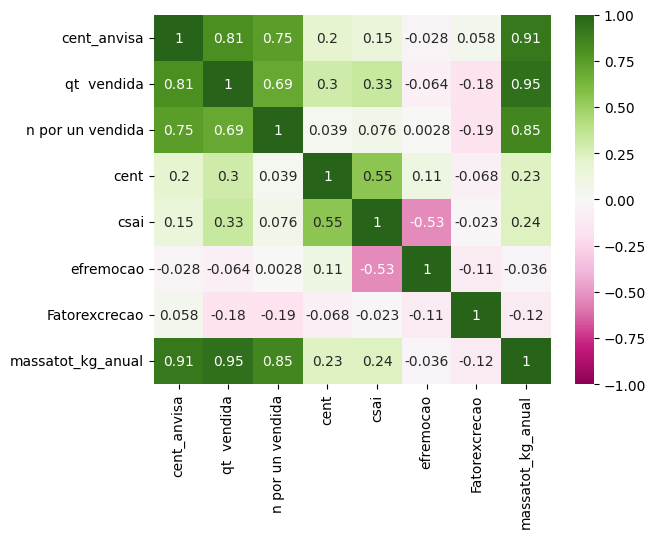

In [ ]:
# Correlação
# O .corr já normaliza os valores automaticamente. Pearson é o default

sns.heatmap(antibioticos_numericas.corr(method = 'pearson'), annot=True, vmin=-1, vmax=1, cmap = "PiYG")

In [ ]:
from scipy.stats import pearsonr, spearmanr

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

# p-valor de r
p_values = antibioticos_numericas.corr(method=pearsonr_pval)
p_values

,cent_anvisa,qt vendida,n por un vendida,cent,csai,efremocao,Fatorexcrecao,massatot_kg_anual
cent_anvisa,1.000000e+00,1.117436e-129,3.930579e-99,2.562994e-06,2.741912e-04,5.148898e-01,0.174392,6.229671e-214
qt vendida,1.117436e-129,1.000000e+00,1.285593e-79,7.483898e-13,2.049429e-15,1.307319e-01,0.000018,7.087237e-275
n por un vendida,3.930579e-99,1.285593e-79,1.000000e+00,3.656728e-01,7.585136e-02,9.472292e-01,0.000010,5.249150e-155
cent,2.562994e-06,7.483898e-13,3.656728e-01,1.000000e+00,8.736447e-46,9.309068e-03,0.109597,4.666549e-08
csai,2.741912e-04,2.049429e-15,7.585136e-02,8.736447e-46,1.000000e+00,1.118225e-41,0.587847,1.047796e-08
efremocao,5.148898e-01,1.307319e-01,9.472292e-01,9.309068e-03,1.118225e-41,1.000000e+00,0.012944,3.984066e-01
Fatorexcrecao,1.743920e-01,1.779077e-05,9.851641e-06,1.095969e-01,5.878468e-01,1.294424e-02,1.000000,5.906837e-03
massatot_kg_anual,6.229671e-214,7.087237e-275,5.249150e-155,4.666549e-08,1.047796e-08,3.984066e-01,0.005907,1.000000e+00


Os p valores do teste de correlação de Pearson indicam que não há uma correlação significante entre a concentração de saída (csai) vs n por un vendida e Fator de Excreção. Portanto, essas duas variáveis não precisam seguir a diante na análise.